In [1]:
import os
import sys
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory

In [4]:
target_raw = '../data/target_raw'
target_proc = '../data/target_processed'
working = '../data/working'

datasets = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

datasets_0k = ['bcc_0k',
               'fcc_0k',
               'vac_0k',
               'i110_0k',
               'i111_0k',
               'screw_111_0k']

In [5]:
#with open(os.path.join(target_proc,  "datasets.pickle"), 'wb') as fo:
#    pickle.dump(datasets, fo)
#
#print(datasets)

In [6]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]
trajdirs_0k = [target_raw + '/' + dataset for dataset in datasets_0k]

In [7]:
trajectories = {}
for name, traj_path in zip(datasets, trajdirs):
    trajectories[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/bcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/fcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OUTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/POSCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/CONTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/XDATCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OSZICAR
Reading ../data/target_raw/vac_npt_l

In [8]:
trajectories_0k = {}
for name, traj_path in zip(datasets_0k, trajdirs_0k):
    trajectories_0k[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_0k/OUTCAR
Reading ../data/target_raw/bcc_0k/POSCAR
Reading ../data/target_raw/bcc_0k/CONTCAR
Reading ../data/target_raw/bcc_0k/XDATCAR
Reading ../data/target_raw/bcc_0k/OSZICAR
Reading ../data/target_raw/bcc_0k/INCAR
Reading ../data/target_raw/fcc_0k/OUTCAR
Reading ../data/target_raw/fcc_0k/POSCAR
Reading ../data/target_raw/fcc_0k/CONTCAR
Reading ../data/target_raw/fcc_0k/OSZICAR
Reading ../data/target_raw/fcc_0k/INCAR
Reading ../data/target_raw/vac_0k/OUTCAR
Reading ../data/target_raw/vac_0k/POSCAR
Reading ../data/target_raw/vac_0k/CONTCAR
Reading ../data/target_raw/vac_0k/OSZICAR
Reading ../data/target_raw/vac_0k/INCAR
Reading ../data/target_raw/i110_0k/OUTCAR
Reading ../data/target_raw/i110_0k/POSCAR
Reading ../data/target_raw/i110_0k/CONTCAR
Reading ../data/target_raw/i110_0k/XDATCAR
Reading ../data/target_raw/i110_0k/OSZICAR
Reading ../data/target_raw/i110_0k/INCAR
Reading ../data/target_raw/i111_0k/OUTCAR
Reading ../data/target_raw/i111_0k/POSCAR
Re

In [617]:
# Convert MD trajectory dicts to objects
trjs = {}
for k, trj in trajectories.items():
    trjs[k] = Trajectory(trj, inplace=False)

In [618]:
# Convert MD trajectory 0K configs to objects
trjs_0k = {}
for k, trj in trajectories_0k.items():
    trjs_0k[k] = Trajectory(trj, inplace=False)[-1]

In [619]:
# join 0 K configurations into a pseudo-trajectory
traj0k = copy.deepcopy(trjs_0k['bcc_0k'])

for k, trj in trjs_0k.items():
    print(k)
    if 'bcc' not in k:
        traj0k.append(trj)
    print(len(traj0k['box']))

bcc_0k
1
fcc_0k
2
vac_0k
3
i110_0k
4
i111_0k
5
screw_111_0k
6


In [620]:
traj0k['energy']

[-1656.1778, -790.30178, -1640.1278, -1657.4853, -1657.8379, -1735.6497]

In [621]:
(-1657.4853 + 1657.8379)

0.3525999999999385

In [622]:
ubcc = -1656.1778

(-1640.1278 - ubcc*127/128)

3.111110937499916

In [623]:
# Create an artificial configuration with large box and 0 energy
traj_inf = copy.deepcopy(trjs_0k['bcc_0k'])

In [624]:
def make_infinite_conf(trj):
    """
    Scales box size by 10 to separate all atoms beyond cutoff, and sets energies and forces to 0.
    
    Parameters
    ----------
    trj: Trajectory object (or dict)
         Trajectory to be rescaled
    
    Returns
    -------
    trj: Trajectory object (or dict)
         Rescaled trajectory
    """
    trj['box'][0] = trj['box'][0]*10
    trj['box0'] = trj['box0']*10
    trj['energy'][0] = 0.0
    trj['free_energy'][0] = 0.0
    trj['total_energy'][0] = 0.0
    trj['forces'][0] = np.zeros_like(trj['forces'][0])
    return trj

In [625]:
traj_inf = make_infinite_conf(traj_inf)

In [626]:
traj_inf['box0']

array([[127.48742045,   0.        ,   0.        ],
       [  0.        , 127.48742045,   0.        ],
       [  0.        ,   0.        , 127.48742045]])

In [627]:
traj0k['temp'] = [300.0 for _ in range(len(traj0k['temp']))]

In [628]:
traj0k.append(traj_inf)

In [629]:
trjs['relax'] = traj0k

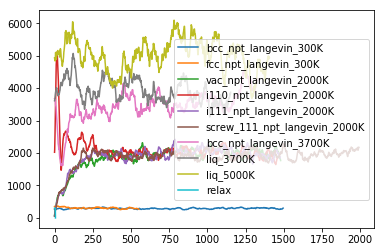

In [630]:
for key, trj in trjs.items():
    #print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=key)

plt.legend()
plt.show()

In [18]:
def get_msd(xyzs):
    """Return mean squared displacement (msd) for a given trajectory (traj)."""
    msd = []
    for rs in xyzs:
        msd.append(np.mean((rs - xyzs[0])**2))
    #msd = [0.0 for _ in range(len(xyzs))]
    return np.array(msd)

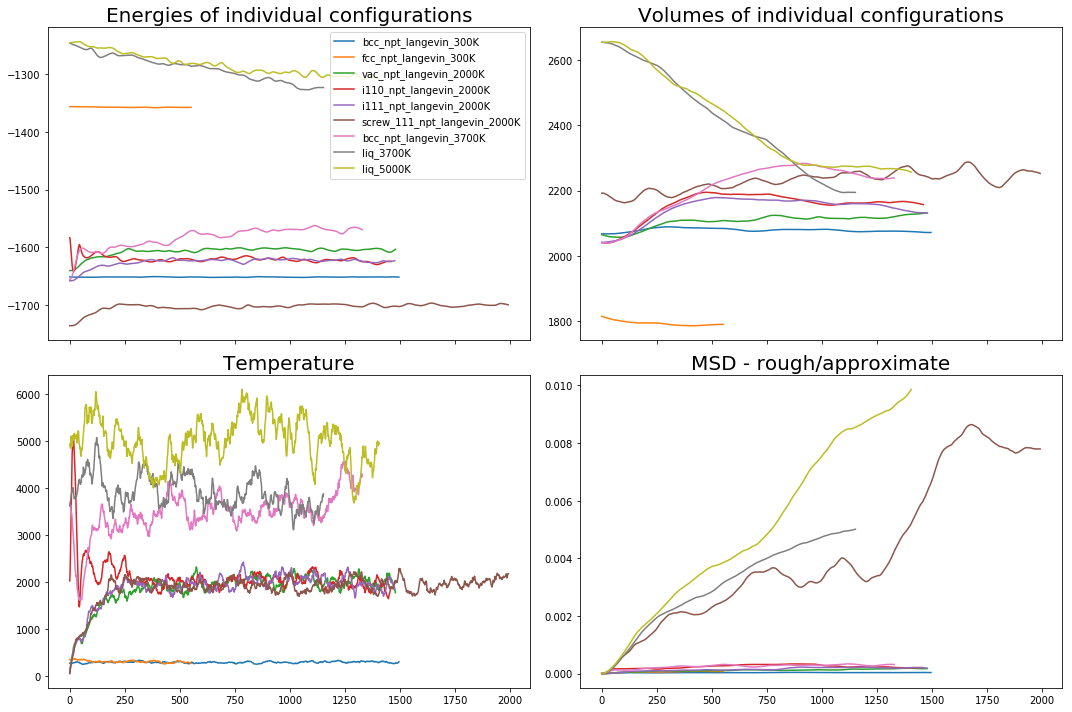

In [632]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trjs.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [633]:
[(k, len(v['energy'])) for k, v in trjs.items()]

[('bcc_npt_langevin_300K', 1496),
 ('fcc_npt_langevin_300K', 552),
 ('vac_npt_langevin_2000K', 1480),
 ('i110_npt_langevin_2000K', 1461),
 ('i111_npt_langevin_2000K', 1477),
 ('screw_111_npt_langevin_2000K', 1992),
 ('bcc_npt_langevin_3700K', 1329),
 ('liq_3700K', 1153),
 ('liq_5000K', 1406),
 ('relax', 7)]

In [634]:
cuts = {'bcc_npt_langevin_300K':100,
        'fcc_npt_langevin_300K':50,
        'vac_npt_langevin_2000K':300,
        'i110_npt_langevin_2000K':700,
        'i111_npt_langevin_2000K':700,
        'screw_111_npt_langevin_2000K':600,
        'bcc_npt_langevin_3700K':500,
        'liq_3700K':800,
        'liq_5000K':800,
        'relax':0}

In [635]:
trj_samples = {}
for key, traj in trjs.items():
    if 'relax' not in key:
        trj_samples[key] = traj[cuts[key]::3]
    else:
        trj_samples[key] = traj[cuts[key]:]

In [636]:
[(k, len(v['energy'])) for k, v in trj_samples.items()]

[('bcc_npt_langevin_300K', 466),
 ('fcc_npt_langevin_300K', 168),
 ('vac_npt_langevin_2000K', 394),
 ('i110_npt_langevin_2000K', 254),
 ('i111_npt_langevin_2000K', 259),
 ('screw_111_npt_langevin_2000K', 464),
 ('bcc_npt_langevin_3700K', 277),
 ('liq_3700K', 118),
 ('liq_5000K', 202),
 ('relax', 7)]

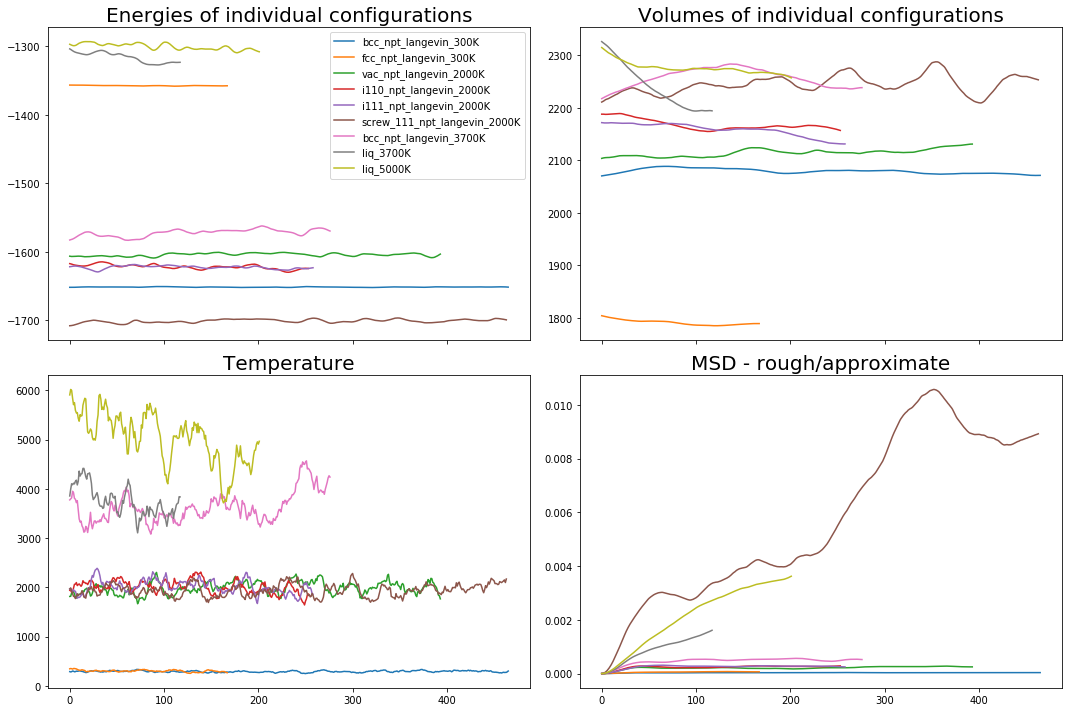

In [637]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trj_samples.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [5]:
target_proc = '../data/target_processed'
with open(os.path.join(target_proc,  "datasets_filtered.pickle"), 'rb') as fi:
    datasets = pickle.load(fi)
    print(datasets)

['bcc_npt_langevin_300K_filtered', 'fcc_npt_langevin_300K_filtered', 'vac_npt_langevin_2000K_filtered', 'i110_npt_langevin_2000K_filtered', 'i111_npt_langevin_2000K_filtered', 'screw_111_npt_langevin_2000K_filtered', 'bcc_npt_langevin_3700K_filtered', 'liq_3700K_filtered', 'liq_5000K_filtered']


In [6]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory

In [9]:
datasets2 = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K',
            'relax']

In [10]:
trajectories = {}
for dset, key in zip(datasets, datasets2):
    with open(os.path.join(target_proc, dset + ".pickle"), 'rb') as fo:
        trajectories[key] = pickle.load(fo)

In [25]:
datasets

['bcc_npt_langevin_300K_filtered',
 'fcc_npt_langevin_300K_filtered',
 'vac_npt_langevin_2000K_filtered',
 'i110_npt_langevin_2000K_filtered',
 'i111_npt_langevin_2000K_filtered',
 'screw_111_npt_langevin_2000K_filtered',
 'bcc_npt_langevin_3700K_filtered',
 'liq_3700K_filtered',
 'liq_5000K_filtered']

In [12]:
with open(os.path.join(target_proc, 'structs_0k' + ".pickle"), 'rb') as fo:
    trajectories['relax'] = pickle.load(fo)

In [28]:
[len(trajectories[d]['xyz']) for d in datasets2]

[120, 26, 118, 117, 118, 170, 103, 86, 111, 5]

In [15]:
trajectories['relax'].keys()

dict_keys(['box', 'xyz', 'energy', 'temp', 'forces'])

In [16]:
# Convert MD trajectory dicts to objects
trj_samples = {}
for k, trj in trajectories.items():
    trj_samples[k] = Trajectory(trj, inplace=False)

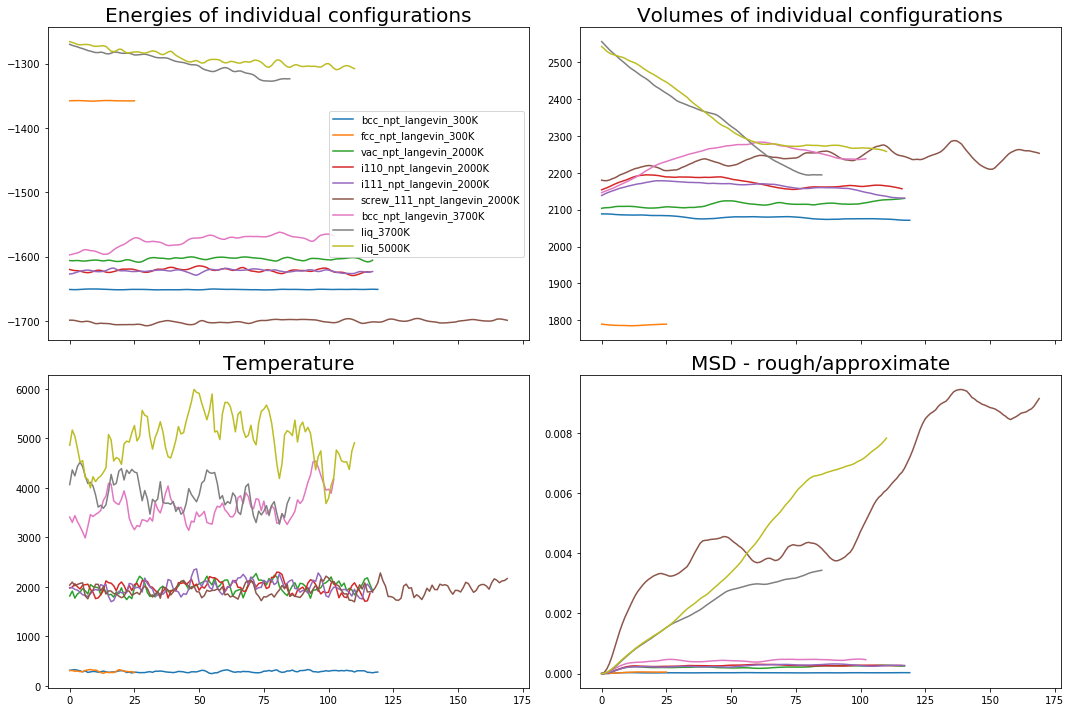

In [19]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trj_samples.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [20]:
weights = {k:1.0 for k in trj_samples}
weights['relax'] = 10.0

target_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # target data
    target_dict = {'type':'trajectory', 'weight':weights[key]}
    target_dict['box'] = trj['box']
    target_dict['xyz'] = trj['xyz']
    target_dict['energy'] = trj['energy']
    target_dict['temp'] = trj['temp']

    # save inverse temperature data (if T=0, set beta=1/300)
    target_dict['beta'] = np.empty_like(target_dict['temp'])
    for i, temp in enumerate(target_dict['temp']):
        if temp == 0.0:
            target_dict['beta'][i] = 1.0/300.0
        else:
            target_dict['beta'][i] = 1.0/temp
            
    target_data[key] = target_dict

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


In [27]:
len(target_data['fcc_npt_langevin_300K']['xyz'])

26

In [21]:
from statmechlib.preprocessing import pair_dist, get_stats_EAM, get_stats_EAM_pairdist

dataset # bcc_npt_langevin_300K
conf 0
x (6,) [   0.            1.51084109  124.1636447   411.30871972  697.22378245
 1200.30464699] [0.00000000e+00 3.29779109e-02 1.20693813e+02 1.32219335e+03
 3.79853013e+03 1.12567229e+04] [0.00000000e+00 3.17172910e-05 1.14754590e+02 1.36791207e+04
 1.12809763e+05 9.90307760e+05]
conf 1
x (6,) [   0.            1.39672154  124.04475778  411.23781257  697.17738071
 1200.27807671] [0.00000000e+00 2.81749860e-02 1.20464910e+02 1.32174807e+03
 3.79803998e+03 1.12562473e+04] [0.00000000e+00 2.39657787e-05 1.14325957e+02 1.36703215e+04
 1.12782427e+05 9.90231954e+05]
conf 2
x (6,) [   0.            1.30648024  124.01721897  411.26214428  697.22594866
 1200.35206959] [0.00000000e+00 2.47847189e-02 1.20400871e+02 1.32189603e+03
 3.79856401e+03 1.12576343e+04] [0.00000000e+00 1.73976358e-05 1.14163247e+02 1.36729948e+04
 1.12812821e+05 9.90475351e+05]
conf 3
x (6,) [   0.            1.28804247  124.09900846  411.36595453  697.3322966
 1200.46811396] [0.0000

x (6,) [   0.            1.40413029  125.18313008  413.18258009  699.53345675
 1203.18545718] [0.00000000e+00 2.64126585e-02 1.22613183e+02 1.33411332e+03
 3.82352258e+03 1.13105099e+04] [0.00000000e+00 1.70000584e-05 1.18161662e+02 1.39203551e+04
 1.14273109e+05 9.99683359e+05]
conf 30
x (6,) [   0.            1.3921716   125.23005627  413.34617886  699.76247222
 1203.49224044] [0.00000000e+00 2.50847932e-02 1.22699659e+02 1.33514205e+03
 3.82597978e+03 1.13162034e+04] [0.00000000e+00 1.29114412e-05 1.18310538e+02 1.39406828e+04
 1.14414471e+05 1.00066356e+06]
conf 31
x (6,) [   0.            1.352905    125.31430057  413.55986386  700.04883451
 1203.87017593] [0.00000000e+00 2.46301668e-02 1.22859574e+02 1.33649922e+03
 3.82907414e+03 1.13232525e+04] [0.00000000e+00 1.26701542e-05 1.18601917e+02 1.39680814e+04
 1.14595184e+05 1.00188982e+06]
conf 32
x (6,) [   0.            1.2552744   125.38386172  413.75498815  700.3161772
 1204.22636942] [0.00000000e+00 2.20590855e-02 1.22989829e+

x (6,) [2.77446148e-04 1.63691147e+00 1.25570529e+02 4.13624637e+02
 7.00009811e+02 1.20376737e+03] [3.84881826e-08 3.81738185e-02 1.23399842e+02 1.33701683e+03
 3.82879983e+03 1.13215555e+04] [7.40670101e-16 7.36933811e-05 1.19783884e+02 1.39829940e+04
 1.14596965e+05 1.00167326e+06]
conf 59
x (6,) [6.68681580e-04 1.59077652e+00 1.25536655e+02 4.13601039e+02
 6.99996014e+02 1.20375471e+03] [2.23567528e-07 3.79065561e-02 1.23325917e+02 1.33683730e+03
 3.82860659e+03 1.13212511e+04] [2.49912197e-14 7.77092227e-05 1.19609945e+02 1.39780723e+04
 1.14580220e+05 1.00159564e+06]
conf 60
x (6,) [   0.            1.58921548  125.55448741  413.67024641  700.09608051
 1203.8823741 ] [0.00000000e+00 3.75700579e-02 1.23353161e+02 1.33726074e+03
 3.82966395e+03 1.13235933e+04] [0.00000000e+00 5.29220121e-05 1.19632409e+02 1.39859128e+04
 1.14638992e+05 1.00198894e+06]
conf 61
x (6,) [   0.            1.61809406  125.59037045  413.76139528  700.21609391
 1204.02960401] [0.00000000e+00 3.62138383e-02

x (6,) [   0.            1.63994902  126.60659508  415.65668208  702.58317039
 1207.02400973] [0.00000000e+00 3.63778327e-02 1.25408921e+02 1.35006774e+03
 3.85681885e+03 1.13826144e+04] [0.00000000e+00 4.05296867e-05 1.23582246e+02 1.42523007e+04
 1.16258106e+05 1.01240593e+06]
conf 88
x (6,) [   0.            1.68705706  126.56928291  415.63390671  702.56597691
 1207.00126222] [0.00000000e+00 4.01620422e-02 1.25331663e+02 1.34991265e+03
 3.85662029e+03 1.13821709e+04] [0.00000000e+00 5.62426619e-05 1.23414142e+02 1.42487048e+04
 1.16244918e+05 1.01232187e+06]
conf 89
x (6,) [   0.            1.61087589  126.48631919  415.55802333  702.48889811
 1206.90861329] [0.00000000e+00 3.74174846e-02 1.25156218e+02 1.34941143e+03
 3.85576888e+03 1.13804218e+04] [0.00000000e+00 4.96434208e-05 1.23023697e+02 1.42377673e+04
 1.16192963e+05 1.01201015e+06]
conf 90
x (6,) [   0.            1.47514747  126.38753757  415.48405153  702.41942166
 1206.83393276] [0.00000000e+00 3.03181323e-02 1.24957524e

x (6,) [   0.            1.83288345  127.05596595  416.32026475  703.37208016
 1207.98954536] [0.00000000e+00 4.22991313e-02 1.26308766e+02 1.35445494e+03
 3.86560519e+03 1.14010217e+04] [0.00000000e+00 4.12330748e-05 1.25388649e+02 1.43481464e+04
 1.16802880e+05 1.01575047e+06]
conf 117
x (6,) [   0.            1.86878167  127.10917099  416.43142794  703.50635464
 1208.1499697 ] [0.00000000e+00 4.22216171e-02 1.26413859e+02 1.35518405e+03
 3.86709212e+03 1.14040687e+04] [0.00000000e+00 4.08420437e-05 1.25594741e+02 1.43638305e+04
 1.16894041e+05 1.01630004e+06]
conf 118
x (6,) [   0.            1.83259386  127.1255924   416.47552504  703.56395861
 1208.21668531] [0.00000000e+00 3.96956312e-02 1.26438378e+02 1.35546027e+03
 3.86771362e+03 1.14053138e+04] [0.00000000e+00 3.38759549e-05 1.25609977e+02 1.43692232e+04
 1.16930181e+05 1.01651681e+06]
conf 119


No handles with labels found to put in legend.


x (6,) [   0.            1.70739982  127.0259885   416.40977345  703.51520237
 1208.17277151] [0.00000000e+00 3.56572083e-02 1.26234565e+02 1.35501698e+03
 3.86715585e+03 1.14044527e+04] [0.00000000e+00 2.97167764e-05 1.25182584e+02 1.43591924e+04
 1.16893885e+05 1.01635207e+06]
dataset # fcc_npt_langevin_300K
conf 0
x (6,) [3.54834348e-02 4.17592034e+00 1.04992867e+02 3.44642003e+02
 5.80785362e+02 1.00075710e+03] [2.07462444e-04 2.47225132e-01 1.02984000e+02 1.10116535e+03
 3.12472052e+03 9.27472267e+03] [9.64866078e-09 1.38597337e-03 1.01550192e+02 1.12826738e+04
 9.05748743e+04 7.96978657e+05]
conf 1
x (6,) [6.36189930e-02 4.29636107e+00 1.05391820e+02 3.45040753e+02
 5.81223411e+02 1.00125773e+03] [7.29635173e-04 2.66878335e-01 1.03753742e+02 1.10370450e+03
 3.12942882e+03 9.28401018e+03] [1.74405622e-07 1.75889032e-03 1.03038083e+02 1.13342852e+04
 9.08469828e+04 7.98576866e+05]
conf 2
x (6,) [7.92783503e-02 4.44335517e+00 1.05700690e+02 3.45340735e+02
 5.81558359e+02 1.00164227e

No handles with labels found to put in legend.


x (6,) [8.77956492e-03 3.89102591e+00 1.04620106e+02 3.44701115e+02
 5.80958518e+02 1.00093522e+03] [1.97203717e-05 2.07524869e-01 1.02204340e+02 1.10161970e+03
 3.12676625e+03 9.27836722e+03] [1.08924718e-10 8.91132833e-04 9.99544088e+01 1.12955506e+04
 9.07153208e+04 7.97723984e+05]
dataset # vac_npt_langevin_2000K
conf 0
x (6,) [6.96165932e-01 8.98560609e+00 1.30394854e+02 4.09281826e+02
 6.88015467e+02 1.18195874e+03] [2.30981440e-02 9.23783718e-01 1.35379738e+02 1.32142180e+03
 3.73058174e+03 1.10052360e+04] [5.27904057e-05 1.67150232e-02 1.50676570e+02 1.38496888e+04
 1.09969123e+05 9.55393074e+05]
conf 1
x (6,) [5.61929593e-01 8.80139667e+00 1.30172535e+02 4.08871529e+02
 6.87537565e+02 1.18141181e+03] [1.36411958e-02 8.60293468e-01 1.35008331e+02 1.31917440e+03
 3.72605341e+03 1.09960411e+04] [1.56599789e-05 1.24917409e-02 1.50154981e+02 1.38193637e+04
 1.09778781e+05 9.54136020e+05]
conf 2
x (6,) [6.72512860e-01 8.84748007e+00 1.30360011e+02 4.08961241e+02
 6.87600605e+02 1.18

x (6,) [8.59155579e-01 8.73255793e+00 1.29715814e+02 4.07797892e+02
 6.86313319e+02 1.17998972e+03] [3.51623857e-02 8.95172823e-01 1.33690913e+02 1.31171679e+03
 3.71237175e+03 1.09695913e+04] [1.12309422e-04 1.76331574e-02 1.45838247e+02 1.36413726e+04
 1.08922580e+05 9.49539279e+05]
conf 28
x (6,) [8.18417576e-01 9.10025599e+00 1.30315991e+02 4.08186396e+02
 6.86576162e+02 1.18020087e+03] [3.31430759e-02 9.31882029e-01 1.34967973e+02 1.31439945e+03
 3.71550221e+03 1.09739139e+04] [9.34400650e-05 1.75849450e-02 1.48828387e+02 1.37052293e+04
 1.09141627e+05 9.50433014e+05]
conf 29
x (6,) [9.13699069e-01 9.58747591e+00 1.31057239e+02 4.08798846e+02
 6.87026896e+02 1.18057789e+03] [3.96802052e-02 1.03341321e+00 1.36700535e+02 1.31868026e+03
 3.72079151e+03 1.09814030e+04] [2.04057097e-04 2.20556305e-02 1.53569342e+02 1.38089354e+04
 1.09502268e+05 9.51903901e+05]
conf 30
x (6,) [1.03773274e+00 9.89151966e+00 1.31546709e+02 4.09335606e+02
 6.87450029e+02 1.18096945e+03] [5.64828768e-02 1.

x (6,) [8.41053050e-01 9.51889137e+00 1.29959526e+02 4.06540732e+02
 6.83929920e+02 1.17634187e+03] [2.91474638e-02 1.00026918e+00 1.34629267e+02 1.30507330e+03
 3.68873722e+03 1.09045978e+04] [9.20379602e-05 1.85743762e-02 1.49343160e+02 1.35612645e+04
 1.07783748e+05 9.39265800e+05]
conf 56
x (6,) [9.44574114e-01 9.68041414e+00 1.30523219e+02 4.07178211e+02
 6.84555861e+02 1.17700485e+03] [3.71959955e-02 1.05564001e+00 1.35786577e+02 1.30931859e+03
 3.69590729e+03 1.09177642e+04] [1.15600748e-04 2.11426842e-02 1.51792647e+02 1.36550290e+04
 1.08248995e+05 9.41826192e+05]
conf 57
x (6,) [8.45136541e-01 1.00236287e+01 1.30929239e+02 4.07526852e+02
 6.84900278e+02 1.17741494e+03] [2.98971828e-02 1.05894407e+00 1.36542789e+02 1.31167637e+03
 3.69992918e+03 1.09260067e+04] [7.34613819e-05 1.86991785e-02 1.53260644e+02 1.37095044e+04
 1.08520209e+05 9.43465663e+05]
conf 58
x (6,) [8.71272076e-01 1.02159531e+01 1.31131963e+02 4.07676375e+02
 6.85071481e+02 1.17768717e+03] [2.95691458e-02 1.

x (6,) [1.10821560e+00 9.86166668e+00 1.31346820e+02 4.08088986e+02
 6.85531530e+02 1.17811004e+03] [4.15603317e-02 1.09392704e+00 1.37379518e+02 1.31458692e+03
 3.70516985e+03 1.09358091e+04] [9.66892466e-05 2.17805751e-02 1.55491860e+02 1.37452259e+04
 1.08656115e+05 9.44133367e+05]
conf 84
x (6,) [1.17374887e+00 1.00301641e+01 1.31458018e+02 4.07966684e+02
 6.85283887e+02 1.17767762e+03] [4.33167630e-02 1.14014911e+00 1.37712967e+02 1.31395433e+03
 3.70262946e+03 1.09279039e+04] [1.05553875e-04 2.30088550e-02 1.56634978e+02 1.37377187e+04
 1.08521093e+05 9.42805175e+05]
conf 85
x (6,) [1.07326692e+00 9.99020491e+00 1.31085062e+02 4.07561046e+02
 6.84878115e+02 1.17720143e+03] [3.76459480e-02 1.11411282e+00 1.36960493e+02 1.31136411e+03
 3.69820721e+03 1.09189267e+04] [6.77802320e-05 2.09832177e-02 1.54938135e+02 1.36830922e+04
 1.08253722e+05 9.41197768e+05]
conf 86
x (6,) [8.53345987e-01 9.60658257e+00 1.30277677e+02 4.06867527e+02
 6.84264394e+02 1.17659266e+03] [2.56046467e-02 9.

x (6,) [1.05255347e+00 9.73250040e+00 1.28879573e+02 4.04175182e+02
 6.80874530e+02 1.17241438e+03] [4.26422723e-02 1.08017759e+00 1.32327175e+02 1.28930492e+03
 3.65472069e+03 1.08303010e+04] [2.14811951e-04 2.49662674e-02 1.44462393e+02 1.32125187e+04
 1.05679562e+05 9.25966628e+05]
conf 112
x (6,) [1.12562635e+00 9.57696748e+00 1.28652256e+02 4.03923097e+02
 6.80679187e+02 1.17225326e+03] [5.31214065e-02 1.09152818e+00 1.31798298e+02 1.28747195e+03
 3.65233015e+03 1.08269344e+04] [2.41276591e-04 2.87607292e-02 1.43157073e+02 1.31657575e+04
 1.05506277e+05 9.25253137e+05]
conf 113
x (6,) [9.46916655e-01 9.10996230e+00 1.27967940e+02 4.03252040e+02
 6.80098009e+02 1.17170506e+03] [3.45442858e-02 9.62050801e-01 1.30180188e+02 1.28275262e+03
 3.64552026e+03 1.08160162e+04] [7.82989986e-05 1.96969783e-02 1.38663588e+02 1.30507912e+04
 1.05045333e+05 9.23113391e+05]
conf 114
x (6,) [6.83627204e-01 8.84418101e+00 1.27404237e+02 4.02631708e+02
 6.79554438e+02 1.17119874e+03] [1.66673970e-02

No handles with labels found to put in legend.


x (6,) [9.14743508e-01 9.17224142e+00 1.27693940e+02 4.02194292e+02
 6.78732605e+02 1.16996547e+03] [3.57882744e-02 9.76742163e-01 1.29702015e+02 1.27608824e+03
 3.63081898e+03 1.07834315e+04] [1.01639164e-04 1.88710040e-02 1.37778090e+02 1.29173696e+04
 1.04191470e+05 9.17402685e+05]
dataset # i110_npt_langevin_2000K
conf 0
x (6,) [   1.80779702   11.18260714  132.20983027  411.22606555  691.89680187
 1191.70943079] [2.94657042e-01 1.89837422e+00 1.39068744e+02 1.31588251e+03
 3.71662076e+03 1.10160041e+04] [3.18542828e-02 2.78931147e-01 1.69652290e+02 1.36359392e+04
 1.07733057e+05 9.43084849e+05]
conf 1
x (6,) [   1.50975433   10.9737443   131.80174386  410.38462688  690.82498719
 1190.29383282] [1.59394144e-01 1.63702768e+00 1.37878616e+02 1.31001420e+03
 3.70448647e+03 1.09889425e+04] [6.88821424e-03 1.32537135e-01 1.64012947e+02 1.34908186e+04
 1.06952123e+05 9.38135693e+05]
conf 2
x (6,) [   1.30555291   10.41207277  131.23724051  409.57749946  689.857224
 1189.07828467] [1.1865

x (6,) [7.59577031e-01 8.26343176e+00 1.25182453e+02 4.00794256e+02
 6.79226972e+02 1.17601483e+03] [4.63810852e-02 9.21507892e-01 1.23708909e+02 1.24845598e+03
 3.58000039e+03 1.07254864e+04] [5.10901911e-04 3.28704970e-02 1.28262541e+02 1.22096769e+04
 9.97565953e+04 8.93232140e+05]
conf 29
x (6,) [7.66388601e-01 8.10472917e+00 1.24843286e+02 4.00427398e+02
 6.78930927e+02 1.17578411e+03] [4.82402162e-02 8.83671203e-01 1.22937321e+02 1.24618188e+03
 3.57697082e+03 1.07214373e+04] [5.26290596e-04 3.08828541e-02 1.26273899e+02 1.21659199e+04
 9.95984141e+04 8.92611208e+05]
conf 30
x (6,) [7.32196818e-01 8.23844108e+00 1.24876604e+02 4.00230163e+02
 6.78708420e+02 1.17556316e+03] [4.68122774e-02 8.68719559e-01 1.22985169e+02 1.24521772e+03
 3.57505339e+03 1.07180298e+04] [5.60131668e-04 2.84098274e-02 1.26318275e+02 1.21580960e+04
 9.95415672e+04 8.92257422e+05]
conf 31
x (6,) [7.33882076e-01 8.58228541e+00 1.25304216e+02 4.00567700e+02
 6.79016238e+02 1.17591173e+03] [4.47995193e-02 9.

x (6,) [8.81684916e-01 9.34997706e+00 1.29119202e+02 4.05553126e+02
 6.84621230e+02 1.18243841e+03] [5.20868652e-02 1.10698654e+00 1.31853737e+02 1.27929694e+03
 3.63865496e+03 1.08454669e+04] [3.90403087e-04 4.22324421e-02 1.46855014e+02 1.28616597e+04
 1.03231456e+05 9.14173114e+05]
conf 58
x (6,) [1.07687777e+00 9.92065687e+00 1.30163857e+02 4.06484650e+02
 6.85519998e+02 1.18329490e+03] [6.42949791e-02 1.25437826e+00 1.33937182e+02 1.28496336e+03
 3.64785275e+03 1.08606298e+04] [5.05761042e-04 5.08883651e-02 1.51464645e+02 1.29674279e+04
 1.03712984e+05 9.16543288e+05]
conf 59
x (6,) [   1.49939801   10.88255492  131.19083773  407.34764148  686.34028634
 1184.1011775 ] [8.39663892e-02 1.47404695e+00 1.36008343e+02 1.29024988e+03
 3.65634826e+03 1.08751019e+04] [7.69698213e-04 6.01499572e-02 1.55892993e+02 1.30668386e+04
 1.04168676e+05 9.18873977e+05]
conf 60
x (6,) [   1.75362072   11.64801332  131.67133036  407.82146771  686.8379592
 1184.67782416] [9.52556141e-02 1.60438905e+00 

x (6,) [   1.5017146    10.66880688  131.64724812  409.42705598  689.43628114
 1188.57894629] [2.02006225e-01 1.55089548e+00 1.36861369e+02 1.30337580e+03
 3.68951196e+03 1.09577951e+04] [1.33597760e-02 1.40477813e-01 1.58172268e+02 1.33318372e+04
 1.06079373e+05 9.32999520e+05]
conf 87
x (6,) [   1.40647461   10.41714032  131.53658224  409.47326663  689.43535896
 1188.52076908] [1.45487169e-01 1.45155261e+00 1.36543334e+02 1.30366413e+03
 3.68960372e+03 1.09569825e+04] [5.55656225e-03 9.40825944e-02 1.56535167e+02 1.33363956e+04
 1.06096522e+05 9.32954537e+05]
conf 88
x (6,) [   1.23401177   10.20865403  131.3681911   409.47649465  689.43755834
 1188.47351066] [8.95435355e-02 1.33119754e+00 1.36140623e+02 1.30367033e+03
 3.68963856e+03 1.09561664e+04] [1.43147100e-03 6.17095563e-02 1.55152088e+02 1.33363731e+04
 1.06102686e+05 9.32843236e+05]
conf 89
x (6,) [1.05397337e+00 9.91509669e+00 1.30909340e+02 4.09290206e+02
 6.89329576e+02 1.18836720e+03] [8.53470563e-02 1.25258690e+00 1.352

x (6,) [   1.35571195   10.38139863  131.30297786  409.63729973  690.13676928
 1189.69878054] [8.83365420e-02 1.37408524e+00 1.36083605e+02 1.30445033e+03
 3.69649511e+03 1.09775085e+04] [7.81962040e-04 5.72876374e-02 1.55567809e+02 1.33441177e+04
 1.06425336e+05 9.36047661e+05]
conf 116


No handles with labels found to put in legend.


x (6,) [   1.43942442   10.51070794  131.29466541  409.8841344   690.60207009
 1190.42648902] [1.13007244e-01 1.43498916e+00 1.36244310e+02 1.30638896e+03
 3.70196029e+03 1.09915915e+04] [1.50050196e-03 7.38892675e-02 1.57266174e+02 1.34006460e+04
 1.06797455e+05 9.38673806e+05]
dataset # i111_npt_langevin_2000K
conf 0
x (6,) [   1.81245207   10.70493917  132.60497469  413.78577609  696.07163723
 1197.77391086] [2.07145722e-01 1.67129252e+00 1.38882034e+02 1.33102122e+03
 3.76033682e+03 1.11269846e+04] [9.29085185e-03 1.58544772e-01 1.63802913e+02 1.38960459e+04
 1.10134046e+05 9.61695340e+05]
conf 1
x (6,) [   1.73968856   10.54032865  132.01949499  412.84644777  694.84215575
 1196.15036347] [1.86631254e-01 1.60572117e+00 1.37600898e+02 1.32492089e+03
 3.74694699e+03 1.10966340e+04] [6.84047352e-03 1.33399013e-01 1.60192433e+02 1.37656127e+04
 1.09337346e+05 9.56387689e+05]
conf 2
x (6,) [   1.57672336   10.4120745   131.90470838  412.20792936  693.82567223
 1194.67534655] [1.60860886

x (6,) [9.28765217e-01 9.64626628e+00 1.28558030e+02 4.04608615e+02
 6.83708818e+02 1.18144394e+03] [3.60070346e-02 1.10064023e+00 1.30665371e+02 1.27367205e+03
 3.62972218e+03 1.08286943e+04] [1.40254615e-04 2.61536719e-02 1.43056959e+02 1.27601468e+04
 1.02815906e+05 9.11869479e+05]
conf 29
x (6,) [8.33841644e-01 1.00468324e+01 1.28712374e+02 4.04636922e+02
 6.83749985e+02 1.18150471e+03] [2.54935577e-02 1.11099487e+00 1.30767132e+02 1.27351387e+03
 3.62977680e+03 1.08293469e+04] [7.49728468e-05 2.24236732e-02 1.42319640e+02 1.27437689e+04
 1.02776127e+05 9.11822765e+05]
conf 30
x (6,) [1.06725068e+00 1.04045374e+01 1.29126046e+02 4.04925841e+02
 6.84013592e+02 1.18177387e+03] [5.08900203e-02 1.22930621e+00 1.31546758e+02 1.27516460e+03
 3.63237353e+03 1.08340308e+04] [4.34922947e-04 3.28913079e-02 1.43902058e+02 1.27700322e+04
 1.02898868e+05 9.12520885e+05]
conf 31
x (6,) [   1.33808739   10.34102631  129.31533514  405.13119559  684.20903652
 1182.0061602 ] [9.20946627e-02 1.325486

x (6,) [   1.47750374   10.69670051  130.80582615  407.50321488  686.89330799
 1185.12758793] [1.01865398e-01 1.41333828e+00 1.34936747e+02 1.29074936e+03
 3.66164523e+03 1.08930304e+04] [1.30710055e-03 5.87578980e-02 1.51996519e+02 1.30576439e+04
 1.04403796e+05 9.21591562e+05]
conf 58
x (6,) [   1.44808279   10.54801762  130.87574624  407.66467008  687.00284616
 1185.10325671] [1.13339523e-01 1.40921600e+00 1.35207455e+02 1.29194188e+03
 3.66293683e+03 1.08926410e+04] [2.26536229e-03 6.83272495e-02 1.53312649e+02 1.30897997e+04
 1.04493552e+05 9.21548217e+05]
conf 59
x (6,) [   1.39293831   10.57468075  130.91309031  407.77862209  687.05378072
 1185.0289253 ] [1.16932622e-01 1.41415469e+00 1.35424188e+02 1.29289564e+03
 3.66371560e+03 1.08914817e+04] [2.30823622e-03 7.03855350e-02 1.54384629e+02 1.31183908e+04
 1.04564185e+05 9.21419785e+05]
conf 60
x (6,) [   1.4143696    10.52674909  130.84919478  407.76340356  686.98553655
 1184.85329754] [1.08881716e-01 1.41068417e+00 1.35387040e

x (6,) [   1.67295184   11.1873735   131.31399664  409.51312091  689.86884397
 1189.17283837] [1.42841752e-01 1.58514068e+00 1.36113349e+02 1.30373292e+03
 3.69373702e+03 1.09679069e+04] [2.58132820e-03 8.00132174e-02 1.55420500e+02 1.33304470e+04
 1.06274150e+05 9.34428124e+05]
conf 87
x (6,) [   1.60223795   11.30320439  131.40812447  409.81287241  690.12637732
 1189.356978  ] [1.19585448e-01 1.56894043e+00 1.36383569e+02 1.30574729e+03
 3.69663000e+03 1.09714828e+04] [1.95110834e-03 7.18426377e-02 1.56069099e+02 1.33749657e+04
 1.06455338e+05 9.35099666e+05]
conf 88
x (6,) [   1.43780407   10.8848682   131.31077309  410.03200782  690.31759802
 1189.4979937 ] [9.25508815e-02 1.43870930e+00 1.36214015e+02 1.30720950e+03
 3.69876916e+03 1.09741941e+04] [9.74694711e-04 5.68383401e-02 1.55456319e+02 1.34061396e+04
 1.06587213e+05 9.35598961e+05]
conf 89
x (6,) [   1.19449377   10.37120401  131.15361764  410.08362629  690.34926248
 1189.50245266] [6.71549100e-02 1.29799352e+00 1.35834858e

x (6,) [   1.2187831     9.81595651  134.32188978  416.38394581  698.87918864
 1201.15755205] [1.12204431e-01 1.34794665e+00 1.42469832e+02 1.34850213e+03
 3.79203261e+03 1.11922070e+04] [2.31206280e-03 8.53418351e-02 1.71619850e+02 1.42914807e+04
 1.12144342e+05 9.73760767e+05]
conf 116
x (6,) [   1.37555811   10.02500702  134.47638688  416.64271686  699.14298194
 1201.3977747 ] [1.27433449e-01 1.40819059e+00 1.42866015e+02 1.35027390e+03
 3.79500695e+03 1.11968346e+04] [2.47243052e-03 9.03974134e-02 1.72987744e+02 1.43351668e+04
 1.12338928e+05 9.74632414e+05]
conf 117


No handles with labels found to put in legend.


x (6,) [   1.46140947   10.48533568  134.79158375  416.99369173  699.48146244
 1201.71922213] [1.38653206e-01 1.49554895e+00 1.43681353e+02 1.35281503e+03
 3.79899390e+03 1.12031782e+04] [2.73780869e-03 9.67939418e-02 1.75671714e+02 1.44026074e+04
 1.12618737e+05 9.75878902e+05]
dataset # screw_111_npt_langevin_2000K
conf 0
Replicating: 1 4 1
x (6,) [7.69848026e-01 9.27239873e+00 1.45164290e+02 4.48561606e+02
 7.48183276e+02 1.27911039e+03] [2.62129240e-02 9.22125566e-01 1.57441979e+02 1.49367348e+03
 4.15156753e+03 1.21274325e+04] [9.31358731e-05 1.57908950e-02 1.89906992e+02 1.66705376e+04
 1.28293863e+05 1.09231431e+06]
conf 1
Replicating: 1 4 1
x (6,) [8.47519243e-01 9.71018170e+00 1.45676432e+02 4.49031827e+02
 7.48703964e+02 1.27976219e+03] [2.89493825e-02 9.96862510e-01 1.58555818e+02 1.49688040e+03
 4.15751941e+03 1.21401032e+04] [7.33474760e-05 1.71536452e-02 1.92624446e+02 1.67451578e+04
 1.28681389e+05 1.09470123e+06]
conf 2
Replicating: 1 4 1
x (6,) [9.26138545e-01 9.862301

x (6,) [7.83098476e-01 8.00692736e+00 1.40857481e+02 4.40586803e+02
 7.38545991e+02 1.26703830e+03] [3.61665046e-02 7.84772662e-01 1.48127548e+02 1.44110966e+03
 4.04559353e+03 1.19002080e+04] [1.56020587e-04 1.52305181e-02 1.67687460e+02 1.55206606e+04
 1.21860292e+05 1.05197387e+06]
conf 27
Replicating: 1 4 1
x (6,) [7.32194521e-01 7.90160320e+00 1.40689099e+02 4.40463773e+02
 7.38378684e+02 1.26678131e+03] [2.96650643e-02 7.64592938e-01 1.47737126e+02 1.44014356e+03
 4.04350061e+03 1.18949947e+04] [9.83294728e-05 1.32738413e-02 1.66620435e+02 1.54933228e+04
 1.21704743e+05 1.05092204e+06]
conf 28
Replicating: 1 4 1
x (6,) [6.03104696e-01 7.43116501e+00 1.40230970e+02 4.40121715e+02
 7.38049869e+02 1.26640542e+03] [2.76102003e-02 6.91184019e-01 1.46793612e+02 1.43788502e+03
 4.03983914e+03 1.18878452e+04] [1.58757323e-04 1.25393216e-02 1.64571121e+02 1.54439935e+04
 1.21478714e+05 1.04963369e+06]
conf 29
Replicating: 1 4 1
x (6,) [4.98381208e-01 6.78623905e+00 1.39592858e+02 4.396827

x (6,) [6.26524520e-01 7.29962395e+00 1.39758247e+02 4.36569585e+02
 7.32476389e+02 1.25859206e+03] [2.51271024e-02 6.69019136e-01 1.45741878e+02 1.41463936e+03
 3.97889554e+03 1.17413387e+04] [8.98026143e-05 1.23052518e-02 1.61931632e+02 1.49426702e+04
 1.17820416e+05 1.02382146e+06]
conf 54
Replicating: 1 4 1
x (6,) [4.38181342e-01 6.88086483e+00 1.38819400e+02 4.35343325e+02
 7.31022449e+02 1.25678144e+03] [1.21813835e-02 5.65973044e-01 1.43758245e+02 1.40666867e+03
 3.96306815e+03 1.17074881e+04] [1.51164509e-05 7.65945113e-03 1.57380259e+02 1.47729999e+04
 1.16878484e+05 1.01789107e+06]
conf 55
Replicating: 1 4 1
x (6,) [4.29825132e-01 6.80192454e+00 1.38118519e+02 4.34248227e+02
 7.29704903e+02 1.25514864e+03] [1.24408600e-02 5.55999416e-01 1.42316891e+02 1.39953355e+03
 3.94861024e+03 1.16767165e+04] [1.86981750e-05 7.41280129e-03 1.54328504e+02 1.46212433e+04
 1.16007013e+05 1.01242389e+06]
conf 56
Replicating: 1 4 1
x (6,) [5.29260280e-01 6.71344193e+00 1.37569645e+02 4.333109

x (6,) [5.90663097e-01 7.02675911e+00 1.35604639e+02 4.29195761e+02
 7.22792376e+02 1.24597405e+03] [2.01620840e-02 6.26497804e-01 1.37669371e+02 1.36870595e+03
 3.87662693e+03 1.15106881e+04] [3.40116113e-05 9.94948670e-03 1.46299089e+02 1.40440191e+04
 1.12088379e+05 9.85179077e+05]
conf 81
Replicating: 1 4 1
x (6,) [5.17950480e-01 6.95347965e+00 1.35446746e+02 4.29208615e+02
 7.22830050e+02 1.24599778e+03] [1.41342604e-02 6.10315354e-01 1.37410273e+02 1.36883686e+03
 3.87709124e+03 1.15112303e+04] [1.53143828e-05 8.39911347e-03 1.45972044e+02 1.40488407e+04
 1.12123312e+05 9.85312321e+05]
conf 82
Replicating: 1 4 1
x (6,) [3.95319129e-01 6.74102513e+00 1.35413090e+02 4.29272425e+02
 7.22891286e+02 1.24604804e+03] [7.96184835e-03 5.48803587e-01 1.37307592e+02 1.36916038e+03
 3.87764618e+03 1.15120256e+04] [4.92268178e-06 6.18824668e-03 1.45661072e+02 1.40531608e+04
 1.12147601e+05 9.85417013e+05]
conf 83
Replicating: 1 4 1
x (6,) [3.09867096e-01 6.50015445e+00 1.35501130e+02 4.292561

x (6,) [5.02216983e-01 6.70853699e+00 1.33869408e+02 4.25211073e+02
 7.17325323e+02 1.23851587e+03] [1.33933624e-02 5.90003338e-01 1.34030038e+02 1.34250586e+03
 3.81681841e+03 1.13712689e+04] [1.67137007e-05 8.25655439e-03 1.38173267e+02 1.34770938e+04
 1.08504189e+05 9.60783643e+05]
conf 108
Replicating: 1 4 1
x (6,) [5.51455555e-01 6.70860605e+00 1.33533105e+02 4.24566456e+02
 7.16537557e+02 1.23750122e+03] [1.78802677e-02 6.03759006e-01 1.33382929e+02 1.33844985e+03
 3.80837913e+03 1.13524260e+04] [3.65827066e-05 9.29072273e-03 1.36935942e+02 1.33961900e+04
 1.08018381e+05 9.57531855e+05]
conf 109
Replicating: 1 4 1
x (6,) [5.99001902e-01 6.57325231e+00 1.33155672e+02 4.24082867e+02
 7.16058671e+02 1.23699159e+03] [2.18700250e-02 5.97331100e-01 1.32560694e+02 1.33528375e+03
 3.80309221e+03 1.13426957e+04] [6.60312458e-05 9.96126985e-03 1.34966247e+02 1.33282396e+04
 1.07697201e+05 9.55768144e+05]
conf 110
Replicating: 1 4 1
x (6,) [5.11890798e-01 6.44227841e+00 1.33310758e+02 4.245

x (6,) [7.05100755e-01 6.67124101e+00 1.32876196e+02 4.23467696e+02
 7.15367384e+02 1.23617981e+03] [4.18191962e-02 6.53507822e-01 1.32198653e+02 1.33176888e+03
 3.79601206e+03 1.13278620e+04] [2.57655464e-04 1.60140931e-02 1.35041322e+02 1.32735186e+04
 1.07331720e+05 9.53310108e+05]
conf 135
Replicating: 1 4 1
x (6,) [5.77644298e-01 6.57657797e+00 1.31263932e+02 4.21210848e+02
 7.12695166e+02 1.23289628e+03] [3.05636298e-02 6.15858427e-01 1.29064824e+02 1.31770679e+03
 3.76784401e+03 1.12679291e+04] [1.76554610e-04 1.27704635e-02 1.28885648e+02 1.29980060e+04
 1.05758709e+05 9.43298617e+05]
conf 136
Replicating: 1 4 1
x (6,) [3.79040514e-01 6.38363889e+00 1.30229587e+02 4.20093692e+02
 7.11544259e+02 1.23166415e+03] [1.05901778e-02 5.36407470e-01 1.26991504e+02 1.31063826e+03
 3.75559174e+03 1.12453105e+04] [1.72628111e-05 6.83497241e-03 1.24533001e+02 1.28543102e+04
 1.05057434e+05 9.39465023e+05]
conf 137
Replicating: 1 4 1
x (6,) [2.46140727e-01 5.88606258e+00 1.29527391e+02 4.195

x (6,) [3.96907300e-01 5.93572509e+00 1.33251562e+02 4.26102087e+02
 7.19343760e+02 1.24179070e+03] [1.27871848e-02 4.93561786e-01 1.32872750e+02 1.34858998e+03
 3.83895288e+03 1.14321505e+04] [2.19121600e-05 7.29527912e-03 1.36239734e+02 1.36186900e+04
 1.09841942e+05 9.71346212e+05]
conf 162
Replicating: 1 4 1
x (6,) [4.11305390e-01 6.03162366e+00 1.33247575e+02 4.26106624e+02
 7.19364287e+02 1.24185567e+03] [1.86495546e-02 5.13680461e-01 1.32740118e+02 1.34832891e+03
 3.83878985e+03 1.14328785e+04] [5.62309115e-05 8.37621050e-03 1.35388753e+02 1.36013094e+04
 1.09788247e+05 9.71309728e+05]
conf 163
Replicating: 1 4 1
x (6,) [3.82383375e-01 6.38806733e+00 1.33772043e+02 4.26793461e+02
 7.20134290e+02 1.24279403e+03] [1.38784522e-02 5.23306700e-01 1.33670021e+02 1.35240477e+03
 3.84667071e+03 1.14497615e+04] [2.81217706e-05 7.00564824e-03 1.36722326e+02 1.36719906e+04
 1.10198915e+05 9.74040007e+05]
conf 164
Replicating: 1 4 1
x (6,) [4.80989499e-01 6.87239339e+00 1.34324283e+02 4.273

No handles with labels found to put in legend.


x (6,) [2.37799703e-01 5.66477144e+00 1.34619164e+02 4.29256616e+02
 7.23178408e+02 1.24661267e+03] [8.50930737e-03 4.10075138e-01 1.35521029e+02 1.36880039e+03
 3.88041965e+03 1.15220487e+04] [2.94940493e-05 4.78822147e-03 1.41264433e+02 1.40366144e+04
 1.12275747e+05 9.86997747e+05]
dataset # bcc_npt_langevin_3700K
conf 0
x (6,) [   2.31646485   13.63009284  134.85318433  409.06540722  685.61760482
 1179.81106306] [1.84301217e-01 2.13853808e+00 1.44957366e+02 1.31180745e+03
 3.67829881e+03 1.08828854e+04] [2.43770559e-03 1.03883000e-01 1.77882315e+02 1.36325293e+04
 1.06385323e+05 9.28118211e+05]
conf 1
x (6,) [   2.40489266   13.84940523  135.12957265  408.73473243  684.99451918
 1178.85043385] [1.87814458e-01 2.19140211e+00 1.45527383e+02 1.31009737e+03
 3.67227666e+03 1.08661415e+04] [2.03490125e-03 1.02406590e-01 1.78951950e+02 1.36129089e+04
 1.06112348e+05 9.25593163e+05]
conf 2
x (6,) [   2.60905631   14.21935993  135.61783861  408.62124658  684.54518867
 1178.04433212] [1.605

x (6,) [   2.23647461   13.168107    130.16120832  393.55019498  661.27744973
 1144.23521799] [1.43641776e-01 1.96474001e+00 1.35817270e+02 1.21648356e+03
 3.42528682e+03 1.02419954e+04] [1.33548709e-03 7.25063434e-02 1.58454294e+02 1.18073485e+04
 9.26282320e+04 8.23801770e+05]
conf 29
x (6,) [   2.26092812   12.73229406  129.05060028  392.34605152  660.11209567
 1142.95563533] [1.23753473e-01 1.87569524e+00 1.33455289e+02 1.20880799e+03
 3.41281532e+03 1.02184229e+04] [5.87835678e-04 6.00889123e-02 1.52672599e+02 1.16490367e+04
 9.19089954e+04 8.19790071e+05]
conf 30
x (6,) [   2.37511963   12.57287004  128.29756138  391.33698684  659.07048169
 1141.80936835] [1.40452212e-01 1.93025278e+00 1.32134304e+02 1.20276755e+03
 3.40206560e+03 1.01976513e+04] [8.79690247e-04 7.02158317e-02 1.50897462e+02 1.15400964e+04
 9.13324339e+04 8.16368879e+05]
conf 31
x (6,) [   2.76930238   13.10868822  128.40441623  390.77952447  658.37641826
 1141.00884607] [1.84249766e-01 2.17100196e+00 1.32506884e

x (6,) [   2.86038986   14.25761537  127.68109072  385.60199776  650.37999515
 1129.54510091] [2.02670724e-01 2.27902497e+00 1.30552796e+02 1.16757339e+03
 3.31310481e+03 9.98044099e+03] [2.07722357e-03 9.26600302e-02 1.45695019e+02 1.08656442e+04
 8.66250271e+04 7.82122771e+05]
conf 58
x (6,) [   2.73082307   13.94737782  126.73533336  384.37359737  649.19984468
 1128.37175792] [1.88933209e-01 2.14943057e+00 1.28443986e+02 1.16003714e+03
 3.30113997e+03 9.95998694e+03] [1.74612443e-03 8.17720949e-02 1.40276837e+02 1.07211380e+04
 8.60028592e+04 7.78995550e+05]
conf 59
x (6,) [   2.54060142   13.66428623  125.76996815  383.53234212  648.43700422
 1127.61482505] [1.71540714e-01 2.04501829e+00 1.26478009e+02 1.15522931e+03
 3.29398438e+03 9.94776843e+03] [1.72709609e-03 7.59435578e-02 1.35864971e+02 1.06416539e+04
 8.56919630e+04 7.77442350e+05]
conf 60
x (6,) [   2.64356101   13.80917753  125.52383588  383.42043241  648.32790017
 1127.45747986] [1.78016578e-01 2.10957918e+00 1.26121818e

x (6,) [   3.02984284   14.83109385  131.82046136  393.29987624  659.64723731
 1141.10723308] [2.10306578e-01 2.43717509e+00 1.39141779e+02 1.21598739e+03
 3.41103414e+03 1.01915425e+04] [1.88950438e-03 1.00273427e-01 1.64965615e+02 1.18250503e+04
 9.20940862e+04 8.17294574e+05]
conf 87
x (6,) [   3.23431313   15.19228086  132.27198198  393.95045557  660.44690601
 1142.10714721] [2.02578291e-01 2.50977166e+00 1.40024189e+02 1.21968506e+03
 3.41892424e+03 1.02089618e+04] [1.19852604e-03 9.63909803e-02 1.66765362e+02 1.18835491e+04
 9.24753118e+04 8.19932816e+05]
conf 88
x (6,) [   3.34698324   15.44707446  132.72539066  394.67029096  661.39763969
 1143.35134027] [2.18152515e-01 2.54156255e+00 1.40757794e+02 1.22375026e+03
 3.42830687e+03 1.02305681e+04] [1.63173206e-03 9.95406912e-02 1.67806081e+02 1.19480963e+04
 9.29325513e+04 8.23194524e+05]
conf 89
x (6,) [   3.24177505   15.57949761  133.21071374  395.4847578   662.47913951
 1144.7133325 ] [2.12193060e-01 2.54156708e+00 1.41614800e

No handles with labels found to put in legend.


x (6,) [   3.52869903   16.33986642  133.02759272  395.49666061  662.66518534
 1145.10965997] [2.39574485e-01 2.74979732e+00 1.41809398e+02 1.22875823e+03
 3.43989505e+03 1.02575127e+04] [1.89258378e-03 1.14999938e-01 1.72139611e+02 1.20494809e+04
 9.34219828e+04 8.26179379e+05]
dataset # liq_3700K
conf 0
x (6,) [  4.81123935  17.06752722 112.48201581 309.03709409 506.28541865
 870.59597373] [5.49186247e-01 3.76585108e+00 1.17969777e+02 8.61120891e+02
 2.29747410e+03 6.76607699e+03] [1.48230216e-02 3.02812812e-01 1.48660490e+02 7.06584727e+03
 4.91118923e+04 4.19005943e+05]
conf 1
x (6,) [  4.53415171  16.5095714  111.65011288 308.32327136 505.85151345
 870.79127083] [4.68068036e-01 3.49490506e+00 1.16283365e+02 8.57583482e+02
 2.29407080e+03 6.76924266e+03] [1.03727607e-02 2.51396439e-01 1.43991965e+02 7.01141480e+03
 4.89688388e+04 4.19266966e+05]
conf 2
x (6,) [  4.72539493  16.54549335 111.01554999 307.54606209 505.28060858
 870.86285635] [5.82812501e-01 3.65931590e+00 1.15191775e+

x (6,) [  5.80306714  18.59023187 116.55061687 316.60816221 518.63397722
 893.20933547] [6.93999765e-01 4.39991179e+00 1.26009487e+02 9.00859436e+02
 2.40224281e+03 7.09794346e+03] [2.00065068e-02 3.85281495e-01 1.63069773e+02 7.58351654e+03
 5.28301371e+04 4.55028855e+05]
conf 29
x (6,) [  5.79302184  18.44878253 117.12312407 317.95052603 520.3022213
 895.20100456] [8.33064599e-01 4.53995209e+00 1.27221547e+02 9.08161481e+02
 2.41709425e+03 7.12859788e+03] [3.99607409e-02 4.95731471e-01 1.66701364e+02 7.70036855e+03
 5.34423399e+04 4.58727305e+05]
conf 30
x (6,) [  6.06319632  18.5807142  117.61210793 319.05944354 521.65572005
 896.74253769] [8.42354714e-01 4.53202731e+00 1.27826710e+02 9.13626278e+02
 2.42846872e+03 7.15150209e+03] [3.67932178e-02 4.71771211e-01 1.66687180e+02 7.77024834e+03
 5.38554578e+04 4.61283199e+05]
conf 31
x (6,) [  6.11380479  18.81474697 117.94086135 319.72378967 522.4861386
 897.71132155] [7.45265089e-01 4.40584461e+00 1.27945797e+02 9.16490163e+02
 2.4349

x (6,) [  4.63859937  17.41648492 118.35465014 326.18872394 535.24242731
 920.76898996] [4.71507149e-01 3.71253505e+00 1.29245000e+02 9.52730984e+02
 2.55114429e+03 7.52707026e+03] [1.04003908e-02 2.80257126e-01 1.72119859e+02 8.40799372e+03
 5.90269511e+04 5.07828484e+05]
conf 59
x (6,) [  5.30706778  18.45686628 119.03781112 327.00072468 536.38549873
 922.39687373] [5.61662563e-01 4.12979964e+00 1.31182276e+02 9.58407274e+02
 2.56309943e+03 7.55452520e+03] [1.15466339e-02 3.30728147e-01 1.78504711e+02 8.53209146e+03
 5.96628673e+04 5.11752045e+05]
conf 60
x (6,) [  5.92130783  19.16347122 119.24045195 327.49064799 537.32829702
 923.9770762 ] [6.94578685e-01 4.52395284e+00 1.31943264e+02 9.61855073e+02
 2.57293019e+03 7.58143026e+03] [1.85163271e-02 4.06518182e-01 1.81041804e+02 8.60466174e+03
 6.01795005e+04 5.15657933e+05]
conf 61
x (6,) [  6.11351976  19.0391495  118.61232487 327.36607271 537.78096989
 925.18999811] [7.83221980e-01 4.60557956e+00 1.30621308e+02 9.61306705e+02
 2.57

No handles with labels found to put in legend.


x (6,) [  4.38927332  16.81438853 117.90830788 331.06082526 546.18291654
 941.40535404] [3.96296515e-01 3.42420067e+00 1.27943113e+02 9.80184156e+02
 2.65521481e+03 7.86694935e+03] [6.90535580e-03 2.21630332e-01 1.66150283e+02 8.84759726e+03
 6.37840931e+04 5.54228398e+05]
dataset # liq_5000K
conf 0
x (6,) [  6.21519674  18.93491486 113.32787976 306.15162566 501.6070249
 865.72946985] [7.90106805e-01 4.65791087e+00 1.20092396e+02 8.44613857e+02
 2.25175912e+03 6.67786668e+03] [2.44863637e-02 4.39865246e-01 1.53241520e+02 6.74158089e+03
 4.67840084e+04 4.04998758e+05]
conf 1
x (6,) [  5.85193534  18.46824587 113.3732122  306.8373934  502.66026696
 867.05279296] [7.95973485e-01 4.50710709e+00 1.19985974e+02 8.47830980e+02
 2.26025865e+03 6.69685997e+03] [3.31677340e-02 4.81584947e-01 1.52689005e+02 6.77656918e+03
 4.70687745e+04 4.07018875e+05]
conf 2
x (6,) [  5.61752663  18.15544405 113.46054726 307.28329108 503.33320953
 868.00791815] [7.65771499e-01 4.33470076e+00 1.19882081e+02 8.49

x (6,) [  5.6878557   19.22213199 119.7159     321.47990257 523.72216336
 896.95988742] [5.87762256e-01 4.29616816e+00 1.31459104e+02 9.25624031e+02
 2.44571977e+03 7.15334555e+03] [1.11691998e-02 3.11910287e-01 1.72938915e+02 7.92473949e+03
 5.44546240e+04 4.60947856e+05]
conf 30
x (6,) [  6.05468262  19.50758012 120.49643968 322.82308625 525.17919473
 898.6549953 ] [6.96991211e-01 4.53765327e+00 1.33552016e+02 9.34182628e+02
 2.46035602e+03 7.18147235e+03] [2.06804845e-02 3.84874990e-01 1.79943736e+02 8.09176463e+03
 5.51765273e+04 4.64796901e+05]
conf 31
x (6,) [  6.52080851  19.92785768 121.20519659 323.72285946 526.14035883
 899.95864439] [8.78368733e-01 4.95394187e+00 1.35460505e+02 9.40218310e+02
 2.47043049e+03 7.20343403e+03] [3.97671501e-02 5.25046566e-01 1.87236803e+02 8.22380520e+03
 5.57177842e+04 4.67911020e+05]
conf 32
x (6,) [  6.68993508  20.23752178 121.46736152 324.05104093 526.58619399
 900.83975766] [9.76205754e-01 5.20330537e+00 1.36260714e+02 9.42779830e+02
 2.47

x (6,) [  7.97620478  22.35561196 125.3999322  334.50791056 543.77874834
 929.78540265] [1.18837275e+00 6.10634314e+00 1.45142260e+02 1.00147514e+03
 2.63265091e+03 7.67485824e+03] [4.23615126e-02 6.55413744e-01 2.14256700e+02 9.25107753e+03
 6.27484471e+04 5.27718601e+05]
conf 60
x (6,) [  7.80551296  22.23915046 125.15965319 334.47368516 544.0207877
 930.43941979] [1.15028411e+00 6.00923738e+00 1.44580913e+02 1.00071482e+03
 2.63413394e+03 7.68479102e+03] [5.00868979e-02 6.67415313e-01 2.13264535e+02 9.22950664e+03
 6.27737354e+04 5.28932092e+05]
conf 61
x (6,) [  7.94609087  22.24436731 125.08761606 334.40256234 544.15746365
 930.97532612] [1.15998286e+00 6.03735229e+00 1.44873145e+02 1.00083562e+03
 2.63595311e+03 7.69425692e+03] [4.79140439e-02 6.80659888e-01 2.16802858e+02 9.25812749e+03
 6.29319165e+04 5.30474520e+05]
conf 62
x (6,) [  8.00158344  22.34995172 125.28143099 334.53599558 544.4496202
 931.58614069] [1.20961690e+00 6.20248594e+00 1.45926196e+02 1.00303578e+03
 2.6406

x (6,) [  5.62900269  18.83849385 121.17747633 329.62515288 540.0083674
 927.76726778] [7.33085977e-01 4.41540796e+00 1.35319313e+02 9.74165811e+02
 2.60031447e+03 7.64877081e+03] [3.32134828e-02 4.53326212e-01 1.88297865e+02 8.82484549e+03
 6.16147982e+04 5.26141238e+05]
conf 90
x (6,) [  5.23122774  18.45749116 120.89731871 329.19883882 539.55844639
 927.47403949] [5.91181623e-01 4.15632125e+00 1.34790819e+02 9.72081240e+02
 2.59656850e+03 7.64464198e+03] [1.55240921e-02 3.46368827e-01 1.86437273e+02 8.79998315e+03
 6.14912361e+04 5.25784865e+05]
conf 91
x (6,) [  5.42224082  18.74181649 120.35507966 328.47523706 538.78384914
 926.75931258] [5.88982633e-01 4.30149356e+00 1.34208926e+02 9.68689126e+02
 2.58995373e+03 7.63364351e+03] [1.39406920e-02 3.54264540e-01 1.87071859e+02 8.76915363e+03
 6.12619788e+04 5.24517057e+05]
conf 92
x (6,) [  5.89190785  19.1538533  119.75062528 327.72338327 538.04168091
 925.99451506] [7.16070795e-01 4.61540264e+00 1.33350897e+02 9.64435973e+02
 2.582

No handles with labels found to put in legend.


x (6,) [  4.6701238   17.95458665 120.26349154 328.64851886 539.09795815
 927.34146698] [4.23147108e-01 3.82374852e+00 1.32765983e+02 9.66272546e+02
 2.58710063e+03 7.63354979e+03] [5.92332037e-03 2.68715668e-01 1.78821623e+02 8.62180882e+03
 6.06273760e+04 5.21956202e+05]
dataset # relax
conf 0
x (6,) [  0.           0.          53.04702673 175.59361892 297.01426189
 510.17739358] [   0.            0.           52.11087121  570.98368527 1633.65688451
 4820.01801712] [0.00000000e+00 0.00000000e+00 5.02878315e+01 6.03745127e+03
 4.94228670e+04 4.30232846e+05]
conf 1
x (6,) [  0.           0.          51.45502578 170.46439945 288.42871878
 495.56612962] [   0.            0.           49.96759392  548.38480065 1569.97576065
 4634.68053881] [0.00000000e+00 0.00000000e+00 4.71552969e+01 5.67884370e+03
 4.65444808e+04 4.05625877e+05]
conf 2
x (6,) [  0.84410714   2.85999494  59.29116996 185.0734499  309.04945646
 527.39997081] 

No handles with labels found to put in legend.


[1.22551319e-01 7.45935051e-01 6.54734242e+01 6.24238885e+02
 1.73764902e+03 5.05797812e+03] [4.53796910e-03 1.06712274e-01 8.82656903e+01 7.15801700e+03
 5.50390964e+04 4.65405264e+05]
conf 3
x (6,) [  0.95931162   2.59761858  59.20992679 185.05134147 308.9756808
 527.39076605] [1.58407449e-01 7.98339961e-01 6.53383083e+01 6.24107950e+02
 1.73683834e+03 5.05788631e+03] [5.23529881e-03 1.10929666e-01 8.83970411e+01 7.15780013e+03
 5.49929959e+04 4.65423753e+05]
conf 4
x (6,) [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.]


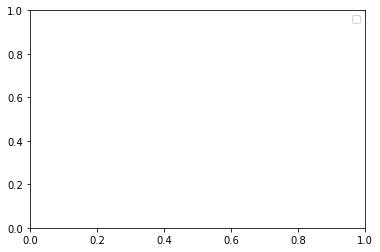

In [24]:
#sc = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]
#sc = [2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0, 5.5, 5.75]
sc = [2.56, 2.73, 3.252, 3.804, 4.20, 4.77]

stats_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    stats_dict = {'energy':[]}
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        print('conf', ii)
        
        a1, ar, a2, f1, fr, f2 = get_stats_EAM_pairdist(xyz, box, sc=sc)

        #print(xyz.shape, box)
        #print('x', a1.shape, rr.shape, np.sum(np.abs(a1)))
        print('x', a1.shape, ar, a1, a2)
        
        stats_dict['energy'].append(np.array([ar, a2, a1]))
        #stats_dict['forces'].append(np.array([fr, f2, f1]))
               # add dataset

            
    plt.legend()
    stats_data[key] = stats_dict

In [30]:
stats_data['function'] = 'EAM-cubic-spline'
stats_data['hyperparams'] = sc

In [32]:
working = '../data/working'
with open(os.path.join(working, "target_check.pickle"), 'wb') as fo:
    pickle.dump(target_data, fo)
    
with open(os.path.join(working, "stats_check.pickle"), 'wb') as fo:
    pickle.dump(stats_data, fo)

In [33]:
#%%writefile -a ../src/optimize/optscript.py

from statmechlib.forcefields import sd2_loss, utot_EAM, udif_print
from scipy.optimize import fmin

In [34]:
#%%writefile -a ../src/optimize/optscript.py

# load target data
with open(os.path.join(working, 'target_check'+'.pickle'), 'rb') as fi:
    targ_dict = pickle.load(fi)

# load stats data
with open(os.path.join(working, 'stats_check'+'.pickle'), 'rb') as fi:
    stats_dict = pickle.load(fi)

In [37]:
#%%writefile -a ../src/optimize/optscript.py

# load stats data
with open(os.path.join(working, 'pars_in'+'.pickle'), 'rb') as fi:
    pars_dict = pickle.load(fi)

In [78]:
stats_dict.keys()

dict_keys(['bcc_npt_langevin_300K', 'fcc_npt_langevin_300K', 'vac_npt_langevin_2000K', 'i110_npt_langevin_2000K', 'i111_npt_langevin_2000K', 'screw_111_npt_langevin_2000K', 'bcc_npt_langevin_3700K', 'liq_3700K', 'liq_5000K', 'relax', 'function', 'hyperparams'])

In [39]:
#%%writefile -a ../src/optimize/optscript.py
pars_in = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
print(pars_in)

[-0.4093427610992626, 0.0, 0.8307314918975489, 6.306463298847209, 2.569446338927059, -0.21327208205268988, -0.22254590199235236, 0.02984117320348275]


In [41]:
# eliminate fcc and screw dislocation from the 'relax' datasets

#stats_dict['relax']['energy'] = [ x for i, x in enumerate(stats_dict['relax']['energy']) if i in [0, 1, 2, 3, 4, 6] ]

#for key in targ_dict['relax']:
#    if 'type' not in key and 'weight' not in key:
#        print(key, len(targ_dict['relax'][key]))
#        targ_dict['relax'][key] = [ x for i, x in enumerate(targ_dict['relax'][key]) if i in [0, 1, 2, 3, 4, 6] ]
#        print(len(targ_dict['relax'][key]))

In [45]:
targ_dict['relax']['xyz'][-1], targ_dict['relax']['energy']

(array([[0. , 0. , 0. ],
        [0.5, 0.5, 0.5],
        [1. , 0. , 0. ],
        [1.5, 0.5, 0.5],
        [2. , 0. , 0. ],
        [2.5, 0.5, 0.5],
        [0. , 1. , 0. ],
        [0.5, 1.5, 0.5],
        [1. , 1. , 0. ],
        [1.5, 1.5, 0.5],
        [2. , 1. , 0. ],
        [2.5, 1.5, 0.5],
        [0. , 2. , 0. ],
        [0.5, 2.5, 0.5],
        [1. , 2. , 0. ],
        [1.5, 2.5, 0.5],
        [2. , 2. , 0. ],
        [2.5, 2.5, 0.5],
        [0. , 0. , 1. ],
        [0.5, 0.5, 1.5],
        [1. , 0. , 1. ],
        [1.5, 0.5, 1.5],
        [2. , 0. , 1. ],
        [2.5, 0.5, 1.5],
        [0. , 1. , 1. ],
        [0.5, 1.5, 1.5],
        [1. , 1. , 1. ],
        [1.5, 1.5, 1.5],
        [2. , 1. , 1. ],
        [2.5, 1.5, 1.5],
        [0. , 2. , 1. ],
        [0.5, 2.5, 1.5],
        [1. , 2. , 1. ],
        [1.5, 2.5, 1.5],
        [2. , 2. , 1. ],
        [2.5, 2.5, 1.5],
        [0. , 0. , 2. ],
        [0.5, 0.5, 2.5],
        [1. , 0. , 2. ],
        [1.5, 0.5, 2.5],


In [715]:
# Final scaling and normalization of data
# %load ../src/optimize/optscript.py

# scale energies (subtract energy of an isolated atom)
# determine interaction energy
print(targ_dict['relax']['energy'][0], len(targ_dict['relax']['xyz'][0]))
u_t = targ_dict['relax']['energy'][0]/len(targ_dict['relax']['xyz'][0])
u_e = -8.9 # external energy from atom (experimental)
u_i = u_t - u_e # internal energy per atom (to be subtracted from all atoms)
print(u_t, u_e, u_i)

emin = 0.0
esum = 0.0
isum = 0.0
lemin = 0.0
lesum = 0.0
lisum = 0.0
for key, trj in targ_dict.items():
    for i in range(len(targ_dict[key]['energy'])):
        targ_dict[key]['energy'][i] -= u_i*targ_dict[key]['xyz'][i].shape[0]
        enex = targ_dict[key]['energy'][i]/targ_dict[key]['xyz'][i].shape[0]

        if 'fcc' in key:
            esum += enex
            isum += 1.0
            if enex < emin:
                imin = i
                #print(enex)
                emin = enex
                xmin = targ_dict[key]['xyz'][i]
                bmin = targ_dict[key]['box'][i]
                smin = stats_dict[key]['energy'][i]

        if 'liq_5000K' in key:
            lesum += enex
            lisum += 1.0
            if enex < lemin:
                limin = i
                #print(enex)
                lemin = enex
                lxmin = targ_dict[key]['xyz'][i]
                lbmin = targ_dict[key]['box'][i]
                lsmin = stats_dict[key]['energy'][i]
                lnat = targ_dict[key]['xyz'][i].shape[0]

print('Emin', emin, esum/isum)

# temporary fix - set fcc energy at 0K to minimum energy of 300K trajectory
targ_dict['relax']['energy'][1] = emin*targ_dict['relax']['xyz'][1].shape[0]
targ_dict['relax']['xyz'][1] = xmin
targ_dict['relax']['box'][1] = bmin
stats_dict['relax']['energy'][1] = smin

targ_dict['relax']['energy'][5] = lemin*lnat
targ_dict['relax']['xyz'][5] = lxmin
targ_dict['relax']['box'][5] = lbmin
stats_dict['relax']['energy'][5] = lsmin

targ_dict['relax']['energy'][-1] = 0.0
print('OK energies:', targ_dict['relax']['energy'])

-1656.1778 128
-12.9388890625 -8.9 -4.038889062499999
Emin -8.538319270833334 -8.531128673390661
OK energies: [-1139.2, -922.13848125, -1127.1888890625, -1136.4686109375002, -1136.8212109375002, -853.1647359375, 0.0]


In [46]:
targ_dict['relax']['weight'] = 30.0
print([targ_dict[k]['weight'] for k in targ_dict])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0]


In [717]:
index = [0, 1, 3, 5, 8, 10]
index = np.array([True if i in index else False for i in range(len(stats_data['hyperparams']))])

In [718]:
def select_nodes(stats_input, index):
    """
    Select only configuration statistics from stats (spline nodes) that are given in index.
    """
    
    stats_select = copy.deepcopy(stats_input)
    
    for key, stats in stats_select.items():
        if type(stats) == dict and 'energy' in stats.keys():
            for i, conf in enumerate(stats['energy']):
                new_conf = np.empty((3, sum(index)), dtype=float)
                new_conf[0] = conf[0][index]
                new_conf[1] = conf[1][index]
                new_conf[2] = conf[2][index]
                stats['energy'][i] = new_conf
                
    stats_select['hyperparams'] = list(np.array(stats_select['hyperparams'])[index])

    return stats_select

In [719]:
stats_opt = select_nodes(stats_dict, index)

In [48]:
stats_opt = stats_dict
stats_opt['hyperparams']

[2.56, 2.73, 3.252, 3.804, 4.2, 4.77]

In [49]:
pars_in

[-0.4093427610992626,
 0.0,
 0.8307314918975489,
 6.306463298847209,
 2.569446338927059,
 -0.21327208205268988,
 -0.22254590199235236,
 0.02984117320348275]

In [50]:
# Formatting for optimization

# prepare data for fitting
stats = []
target = []
for key in list(targ_dict.keys()):
    stats.append(stats_opt[key])
    target.append(targ_dict[key])

# prepare parameters for fitting
multi_pars = []

pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
#multi_pars = [np.array(pars_in)]
pars_in2 = [-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952]
#multi_pars.append(np.array(pars_in))
pars_in1 = [-0.6169796280549427, 0.00010563526234385224, 0.3044078692520532, 6.65890926803851, -1.1489327923874284, 2.2081284218733765, -1.5236567484357728, 0.21922639345669304]
pars_in2 = [-1.4592640134931716, -3.0515321379039898e-05, -0.06397036119840327, 12.43462333841233, -1.4039556209239763, 2.277361245273334, -1.3383612333938921, 0.35119549556765894]

pars_in1 = [-3.2512467172281996, -0.0003202150380230016, 0.15269806859034524, 11.969935407675626, -0.6164601815938373, 2.2310427435982905, -0.9802667652058299, 0.6418078671434688]
pars_in2 = [-2.445149490918154, -0.00020801983958736083, -0.2640494502785708, 0.204150653694475, -0.8354501676207835, 2.5231913314784125, -1.1085851952767731, 0.5027740347187062,]
pars_in3 = [-0.7440002542627315, 1.3187608684512786e-05, -131.04373074002945, 30.6115049563255, -7.626040158485056, 4.444445847922796, -1.2013317345405128, 0.15543885566625482]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-2.9376727625275185, -0.00028022535517750524, -0.06998899879559964, 8.988902981345005, -1.133979308034288, 2.484611922799483, -1.0173639391284288, 0.5833969384340463]
pars_in2 = [-2.3436680210936442, -0.0002067565260307982, -134.89037863511976, 27.962504525433765, -4.032672086835333, 3.247698323035168, -0.9987257996581616, 0.4513984121355687]
pars_in3 = [-0.8995317581781127, -1.2233561504472977e-05, -150.5525413026948, 40.17212749365491, -8.477591070776592, 4.582710884516496, -1.1420118895802114, 0.172979770984942]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-3.004270792293166, -0.000292843788870708, -49.140610378337, 19.78377322180363, -2.1254890071331394, 2.677100169824965, -0.9715996036930384, 0.5849112609684701]
pars_in1 = pars_in

multi_pars.append(np.array(pars_in1))
multi_pars.append(np.array(pars_in2))
multi_pars.append(np.array(pars_in3))
multi_pars.append(np.array(pars_in4))

for _ in range(5):
    pars = np.array(pars_in1)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

#for _ in range(5):
#    pars = np.array(pars_in2)
#    pars += np.random.standard_normal(pars.shape)*0.01
#    multi_pars.append(pars)

#for _ in range(5):
#    pars = np.array(pars_in3)
#    pars += np.random.standard_normal(pars.shape)*0.01
#    multi_pars.append(pars)

#for _ in range(5):
#    pars = np.array(pars_in4)
#    pars += np.random.standard_normal(pars.shape)*0.01
#    multi_pars.append(pars)
    
#for _ in range(5):
#    pars = 0.5*(np.array(pars_in1) + np.array(pars_in2))
#    pars += np.random.standard_normal(pars.shape)*0.01
#    multi_pars.append(pars)

In [51]:
for p in multi_pars:
    print(p)

[-0.40934276  0.          0.83073149  6.3064633   2.56944634 -0.21327208
 -0.2225459   0.02984117]
[-2.34366802e+00 -2.06756526e-04 -1.34890379e+02  2.79625045e+01
 -4.03267209e+00  3.24769832e+00 -9.98725800e-01  4.51398412e-01]
[-8.99531758e-01 -1.22335615e-05 -1.50552541e+02  4.01721275e+01
 -8.47759107e+00  4.58271088e+00 -1.14201189e+00  1.72979771e-01]
[-1.71374482e+00 -1.17552106e-04 -1.01156047e+01  1.80322502e+01
 -4.98137872e+00  3.68871915e+00 -1.14316136e+00  3.47233535e-01]
[-4.15552382e-01 -1.81610138e-03  8.36292359e-01  6.30119390e+00
  2.57171385e+00 -2.27246971e-01 -1.96496294e-01  2.00396039e-02]
[-0.41651723  0.014471    0.82542141  6.30113665  2.57526458 -0.21564129
 -0.21818682  0.03793224]
[-0.44038105 -0.00785998  0.82969227  6.29506293  2.56312081 -0.20800951
 -0.22142705  0.03073975]
[-0.40876018  0.0113381   0.83765152  6.29823926  2.58626126 -0.20325118
 -0.2341444   0.02543494]
[-0.41434607 -0.01437265  0.83149034  6.29145437  2.56282871 -0.2054581
 -0.2331

In [52]:
optimal_parameters = []
for i, pars in enumerate(multi_pars):
    sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
    print('Initial sd2:', sd_ini)
    output = fmin(sd2_loss, list(pars), args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
    params_uopt = output[0]
    print('Opt #', i, output[1:])
    print("Optimized parameters:")
    print(*params_uopt)
    optimal_parameters.append(tuple([output[1:], params_uopt]))

Initial sd2: 0.4264493168492119
Opt # 0 (4.274871391451136e-06, 298, 513, 0)
Optimized parameters:
-1.3378677047016838 -4.200780448647187e-05 0.6135145774994238 6.987162840763377 2.4653295722226023 -0.1592089834151485 0.13873644851863975 0.03649526171529122
Initial sd2: 1.458799575525389
Opt # 1 (8.691146122313222e-07, 1166, 1795, 0)
Optimized parameters:
-1.5423210689784401 -0.00017343233436656878 -90.79414800589194 32.89403373260747 -3.10540157135613 4.060736599127576 -2.1465438441937845 0.4381050467510904
Initial sd2: 6.477694911331084
Opt # 2 (1.8611312156081107e-06, 895, 1385, 0)
Optimized parameters:
-1.2600356776410666 -5.309017460214248e-06 -125.22485346025321 54.38600227821462 -4.871130123262471 3.8948015236778732 -1.6599388466692586 0.22214946666280466
Initial sd2: 2.6634072368867248
Opt # 3 (3.8136631048850724e-06, 1202, 1854, 0)
Optimized parameters:
-1.914994108512986 -0.0004055293174573267 2.5910647881591906 0.9347768070187943 0.7719454261240701 2.0448762080069303 -1.2362

In [657]:
with open(os.path.join(working, 'output_many.pickle'), 'rb') as fi:
    optimal_list = pickle.load(fi)

if type(optimal_list) != list:
    optimal_list = [optimal_list]

optimal_list.append(optimal_parameters)

with open(os.path.join(working, 'output_many.pickle'), 'wb') as fo:
    pickle.dump(optimal_list, fo)

4
54
0 4.274871391451136e-06
[-1.33786770e+00 -4.20078045e-05  6.13514577e-01  6.98716284e+00
  2.46532957e+00 -1.59208983e-01  1.38736449e-01  3.64952617e-02]
Targ: [-480.6000000000204, -468.60958975147514, -478.6412966408825, -478.64398486557184]
[0.07407407 0.0754717  0.07272727 0.07272727]
1 8.691146122313222e-07
[-1.54232107e+00 -1.73432334e-04 -9.07941480e+01  3.28940337e+01
 -3.10540157e+00  4.06073660e+00 -2.14654384e+00  4.38105047e-01]
2 1.8611312156081107e-06
[-1.26003568e+00 -5.30901746e-06 -1.25224853e+02  5.43860023e+01
 -4.87113012e+00  3.89480152e+00 -1.65993885e+00  2.22149467e-01]
3 3.8136631048850724e-06
[-1.91499411e+00 -4.05529317e-04  2.59106479e+00  9.34776807e-01
  7.71945426e-01  2.04487621e+00 -1.23623799e+00  4.46784908e-01]
4 4.082947549990142e-06
[-1.61043561e+00 -2.19109776e-04  1.25223688e-01  1.47345734e+01
  1.48500851e+00 -8.90389357e-02  2.91103076e-01  7.64459828e-02]
5 7.563273562576259e-06
[-1.52763298e+00 -1.72711953e-04 -1.77677070e+00 -7.5438739

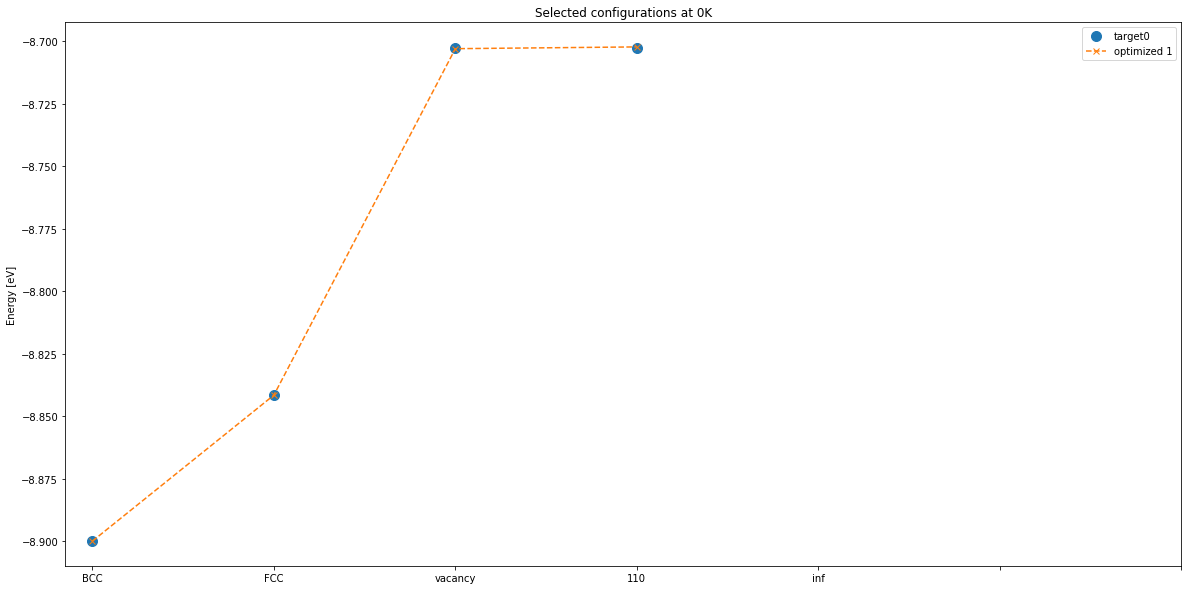

In [73]:
plt.figure(figsize=(20,10))

nat = np.array([len(x) for x in targ_dict['relax']['xyz']])[:-1]
print(len(nat))
print(len(targ_dict['relax']['xyz'][0]))
#print(targ_dict['relax']['xyz'][0])
#print(targ_dict['relax']['box'][0])
#print(targ_dict['relax']['energy'][0])

for i, params_uopt in enumerate(optimal_parameters):
    #if params_uopt[0][0] > 3e-6:
    #    continue
    print(i, params_uopt[0][0])
    print(params_uopt[1])

    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)

    plt.title('Selected configurations at 0K')
    if i == 0:
        print('Targ:', targ_out[-1][:-1])
        #nat = np.array([len(x) for x in targ_dict['relax']['xyz']])
        print(len(np.array(targ_out[-1][:-1]))/nat)
        plt.plot(np.array(targ_out[-1][:-1])/nat, 'o', label='target'+str(i), markersize=10)

    if i != 1:# and i != 27:
        continue
        
    #print('Opti:', [o for o in opti_out[-1][:-1]])
    plt.plot(np.array([o for o in opti_out[-1][:-1]])/nat, 'x--', label='optimized '+str(i))
#    else:
#        plt.plot([o for o in opti_out[-1][:-1]], 'x--', label='optimized '+str(i))
#        plt.plot(targ_out[-1][:-1], 'o', markersize=10)

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['BCC','FCC', 'vacancy','110','inf'])
plt.ylabel('Energy [eV]')
#plt.ylim(-1145, -1136)
#plt.ylim(-8.72, -8.67)
plt.legend()

In [66]:
stats_opt['hyperparams']

[2.56, 2.73, 3.252, 3.804, 4.2, 4.77]

In [74]:
optimal_parameters[1]

((8.691146122313222e-07, 1166, 1795, 0),
 array([-1.54232107e+00, -1.73432334e-04, -9.07941480e+01,  3.28940337e+01,
        -3.10540157e+00,  4.06073660e+00, -2.14654384e+00,  4.38105047e-01]))

In [81]:
stats_opt['relax']['energy'][0]

array([[0.00000000e+00, 0.00000000e+00, 5.30470267e+01, 1.75593619e+02,
        2.97014262e+02, 5.10177394e+02],
       [0.00000000e+00, 0.00000000e+00, 5.02878315e+01, 6.03745127e+03,
        4.94228670e+04, 4.30232846e+05],
       [0.00000000e+00, 0.00000000e+00, 5.21108712e+01, 5.70983685e+02,
        1.63365688e+03, 4.82001802e+03]])

In [ ]:
[array([[0.00000000e+00, 0.00000000e+00, 5.30470267e+01, 1.75593619e+02,
         2.97014262e+02, 5.10177394e+02],
        [0.00000000e+00, 0.00000000e+00, 5.02878315e+01, 6.03745127e+03,
         4.94228670e+04, 4.30232846e+05],
        [0.00000000e+00, 0.00000000e+00, 5.21108712e+01, 5.70983685e+02,
         1.63365688e+03, 4.82001802e+03]]),

In [84]:
targ_dict['relax']['box'][0]

9.554717884929337

In [ ]:
-1.5423210689784401 -0.00017343233436656878 -90.79414800589194 32.89403373260747 -3.10540157135613 4.060736599127576 -2.1465438441937845 0.4381050467510904

0 4.274871391451136e-06
1 8.691146122313222e-07
2 1.8611312156081107e-06
3 3.8136631048850724e-06
4 4.082947549990142e-06
5 7.563273562576259e-06
6 1.8260935238134744e-05
7 6.0177226138079404e-06
8 1.3398659089050026e-05


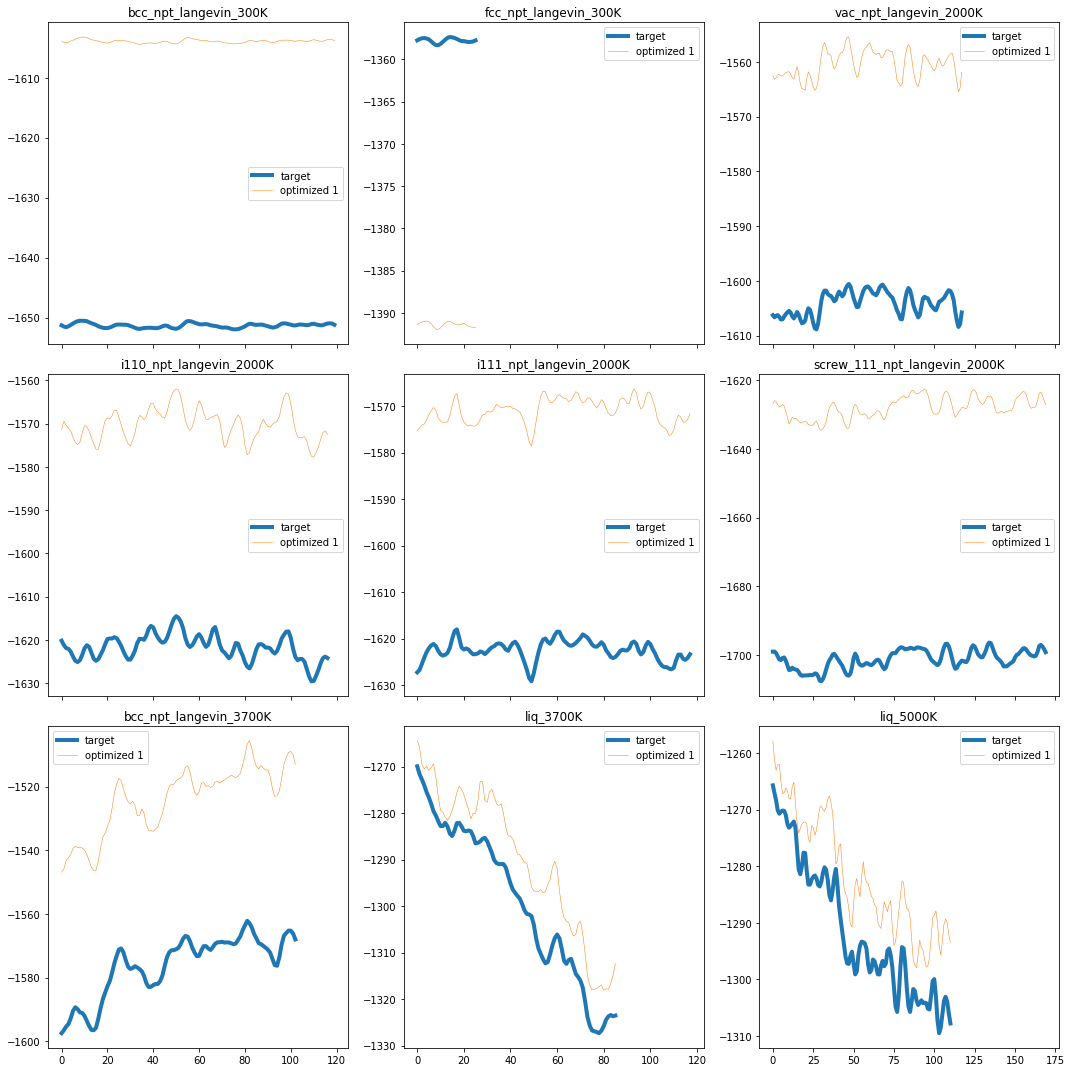

In [63]:
names = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

#x = np.array([-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952])
#optimal_parameters.append(tuple([[3.2627338939720861e-06, 0.0], x]))

fig, axes = plt.subplots(3, 3, sharex='col', figsize=(15,15))

for ip, params_uopt in enumerate(optimal_parameters):

    print(ip, params_uopt[0][0])
    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)

    for i, (tar, opt) in enumerate(zip(targ_out[:-1], opti_out[:-1])):
        x, y = divmod(i, 3)
        tar = np.array(tar)
        opt = np.array(opt)
        #print(names[i], (tar.mean() - opt.mean())/target[i]['xyz'][0].shape[0])
        #if ip == 0:
        #    oo = 
        opt += tar.mean() - opt.mean()
        #print(ip)
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(tar, '-', label='target', linewidth=4)

        #if params_uopt[0][0] > 3e-6:
        #    continue
        if ip != 1:
            continue
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(opt, '-', label='optimized '+str(ip), linewidth=0.5)
        
            if y == 0:
                axes[x,y].set_ylabel('Energy (eV)')
            else:
                axes[x,y].set_ylabel('')

            if x == 2:
                axes[x,y].set_xlabel('configuration #')
            else:
                axes[x,y].set_xlabel('')

            axes[x,y].set_title(names[i])
        else:
            if ip == 0:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=3)
            else:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=0.5)
            axes[x,y].set_title(names[i])

        
        axes[x,y].legend()

        
fig.tight_layout()

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


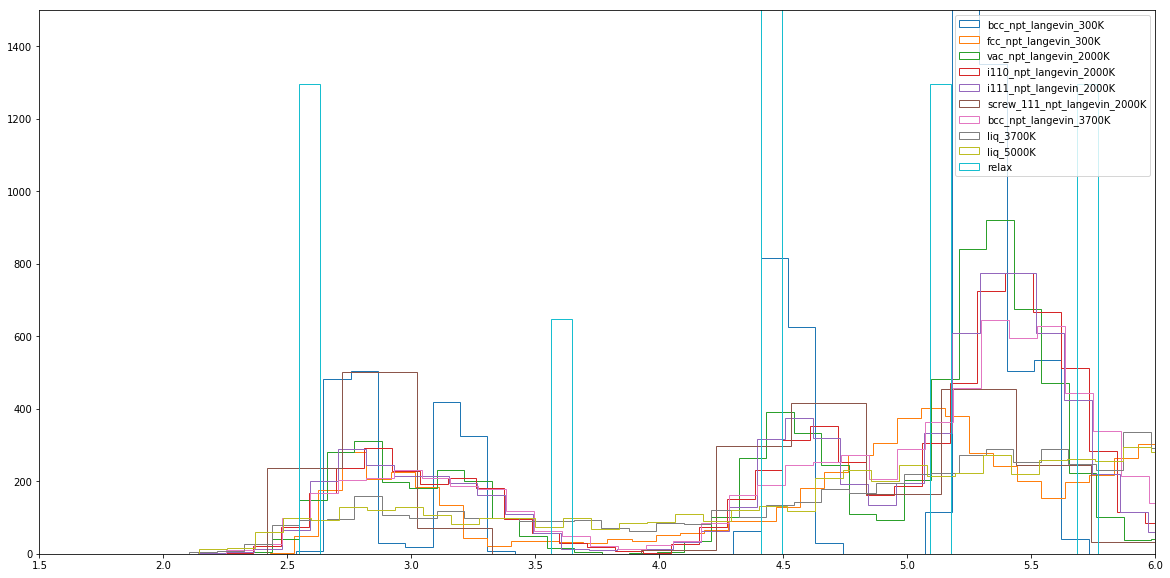

In [669]:
plt.figure(figsize=(20,10))

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        if ii > 1:
            break
                    
        rr, rx = pair_dist(xyz, box)

        if ii == 1:
            plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
            plt.xlim(1.5,6)
            plt.ylim(0,1500)
            
    plt.legend()

In [703]:
f_spline = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

# electronic density function (cubic splines)
#rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

rho = f_spline

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# pair potential function (same spline form as electronic density)
V = rho

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Embedding function. Parameters: electronic density (d), coefficients for 1/2, 1, and 2 powers of density
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# Cohesive potential (cubic splines - same form as V)
phi = V

In [704]:
rho_a = [1.0]
rho_r = [stats_opt['hyperparams'][-1]]

pair_a = pars_in1[2:]
pair_r = stats_opt['hyperparams']

many_a = [pars_in[0], 0.0, pars_in[1]]

In [705]:
# Ranges of densities and separations

nr = 5000
rcut = stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(1.5, rho_a, rho_r)
print('rhomax:', rhomax)
#rhomax = 1000.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

rhomax: 768.0


In [706]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [707]:
from statmechlib.forcefields import u_core

# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [708]:
# LAMMPS format
pot_path = '../sim/potentials'

with open(os.path.join(pot_path, 'W_lvnew.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    fo.write(f"{n_el:5d} ")
    for i in range(n_el):
        fo.write(f"{el_name[i]:2}")
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    
    # atomic number, mass, lattice size, lattice type
    fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))